In [1]:
import numpy as np
import pandas as pd
import pickle
import math

#display
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

import sys
sys.path.append("../")
import src.supportCharts as sc
sys.path.append("../")
import src.supportClean as scl

# input

In [2]:
df = pd.read_csv('../data/grid.csv')
print(df.shape)
df.head()

(12310, 123)


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
0,446400.0,4.477265e+06,1,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,446400.0,4.481768e+06,2,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
2,446400.0,4.472935e+06,3,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,2.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,7.0,0.0,1.0,0.0,0.0,50.0,0.0,0.0,0.0,8.0,4.0,57.0,0.0,0.0,0.0,4.0,0.0,2.0,2.0,0.0,15.0,0.0,1.0,0.0,0.0,115.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
3,446400.0,4.477438e+06,4,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,2.0,34.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,2.0,35.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,81.0,0.0,NaN,NaN,NaN,NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Columns: 123 entries, X to rn_med_tramo
dtypes: float64(108), int64(1), object(14)
memory usage: 11.6+ MB


In [4]:
sc.analisis_basico(df)

_________________________________

1_Data Structure: (12310, 123)


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
0,446400.0,4.477265e+06,1,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,446400.0,4.481768e+06,2,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Columns: 123 entries, X to rn_med_tramo
dtypes: float64(108), int64(1), object(14)
memory usage: 11.6+ MB


None

_________________________________

2_Duplicated columns:
0
_________________________________

3_Null values distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
nulos,0,0,0,6464,6464,6464,6464,6464,6464,6464,6464,9880,9880,9880,10735,9880,9880,9880,10735,9880,10735,10735,9880,10735,10735,9880,9714,9714,9714,9714,9714,9714,9714,9714,7925,7925,7925,7925,7925,7925,7925,11787,11699,11699,11699,11699,11699,11747,11800,12310,11699,11787,11699,11699,11699,11699,11699,11699,11699,11699,12306,11699,11699,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,5322
dtypes,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_zipcode,h_latitude,h_fax,h_cat2cod,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
count,12310.000000,1.231000e+04,12310.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,523.000000,611.000000,611.000000,611.000000,0.0,611.000000,611.000000,611.0,8919.000000,8919.0,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,10405.000000,10405.0,10405.000000,10405.00000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,6988.000000
mean,420362.997013,4.253730e+06,6155.500000,286.465446,555.183202,0.111187,4.590012,18.521040,2923.500000,23992.160965,420.108792,2.090123,1.971605,13.840803,2007.519312,1166.326543,1366.224691,2.090123,12965.939418,1034.009053,2399.508069,2489.271166,1182.090159,3359.718783,5.005714,2629.842387,10.032357,38.729584,333.640986,5.110940,4.538521,1298.500000,117.921418,1.122026,2.806613,7.857925,2.100798,7.487571,6.541619,10.664538,7.015964,7029.263862,306.000000,28016.312602,40.428868,NaN,7029.248773,-3.693574,3.0,0.016818,0.0,4.952797,1.226483,31.213925,0.056621,0.145308,0.139814,2.024779,0.237471,1.200807,0.475277,0.645027,9.532571,0.084202,0.912995,0.023882,0.227604,84.604776,0.015697,0.033349,0.0,9.604613,2.37703,46.774147,0.108313,0.282749,0.269870,3.898126,0.458914,2.314272,0.918981,1.244978,18.394618,0.165690,1.763095,0.047381,0.431043,163.148486,0.029

_________________________________

5_Categorical variables distribution:


,h_web,h_title,h_email,h_body,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_country,h_locality
count,611,611,563,510,611,523,611,611,611,611,611,611,611,4
unique,611,611,556,510,607,11,1,606,1,7,611,1,1,1
top,http://www.esmadrid.com/alojamientos/miau_6,Miau,reservas@hostalivor.com,"<p><strong>Su situación, en la plaza de Santa ...",(+34) 91 429 47 01,4 estrellas,Madrid,"Juan XXIII, 3",Alojamientos,Hoteles,Miau,es,Spain,Madrid
freq,1,1,2,1,2,144,611,2,611,259,1,611,611,4


# variables de catastro

In [5]:
cols_catastro = scl.columnList(df, 'cad_')

the columns that have cad_ on their name are: ['cad_tot_houses', 'cad_tot_hab', 'cad_tot_hotels', 'cad_med_consq', 'cad_tot_parcs', 'cad_pk', 'cad_tot_srf_houses', 'cad_tot_srf_hotels']


numeric variables distribution


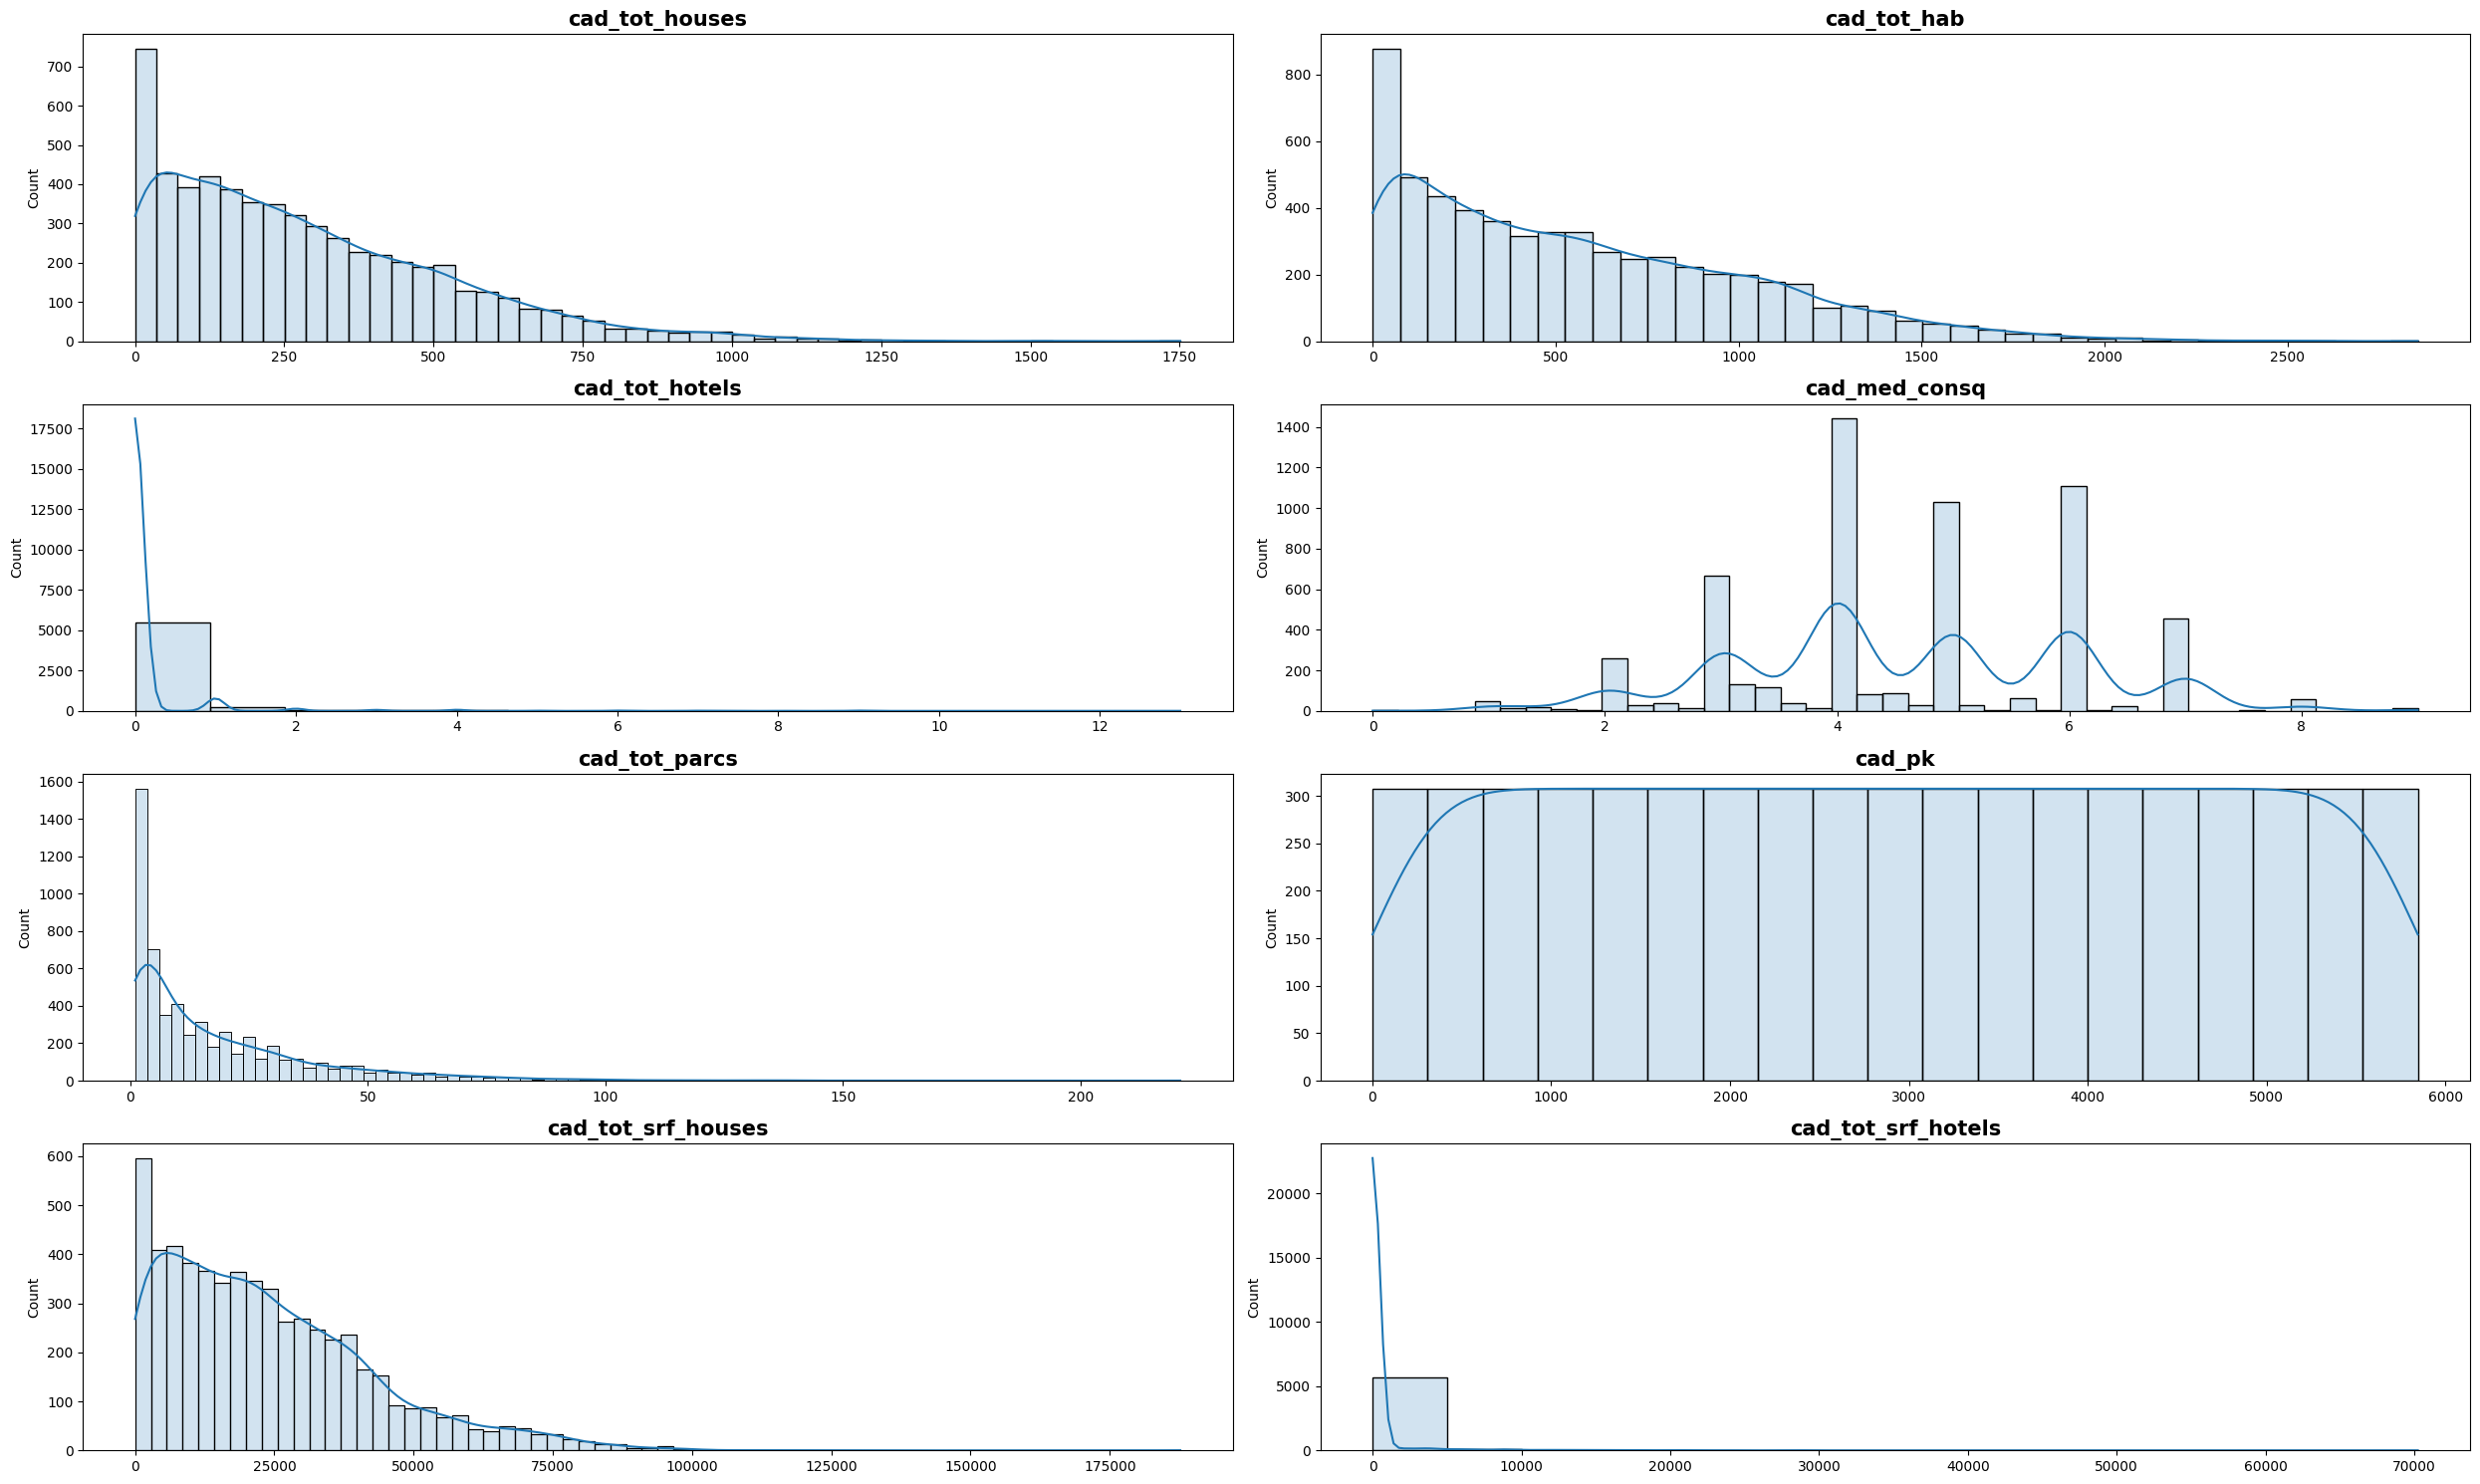

In [6]:
sc.distribucion_numericas(df[cols_catastro])

numeric variables distribution -> outliers


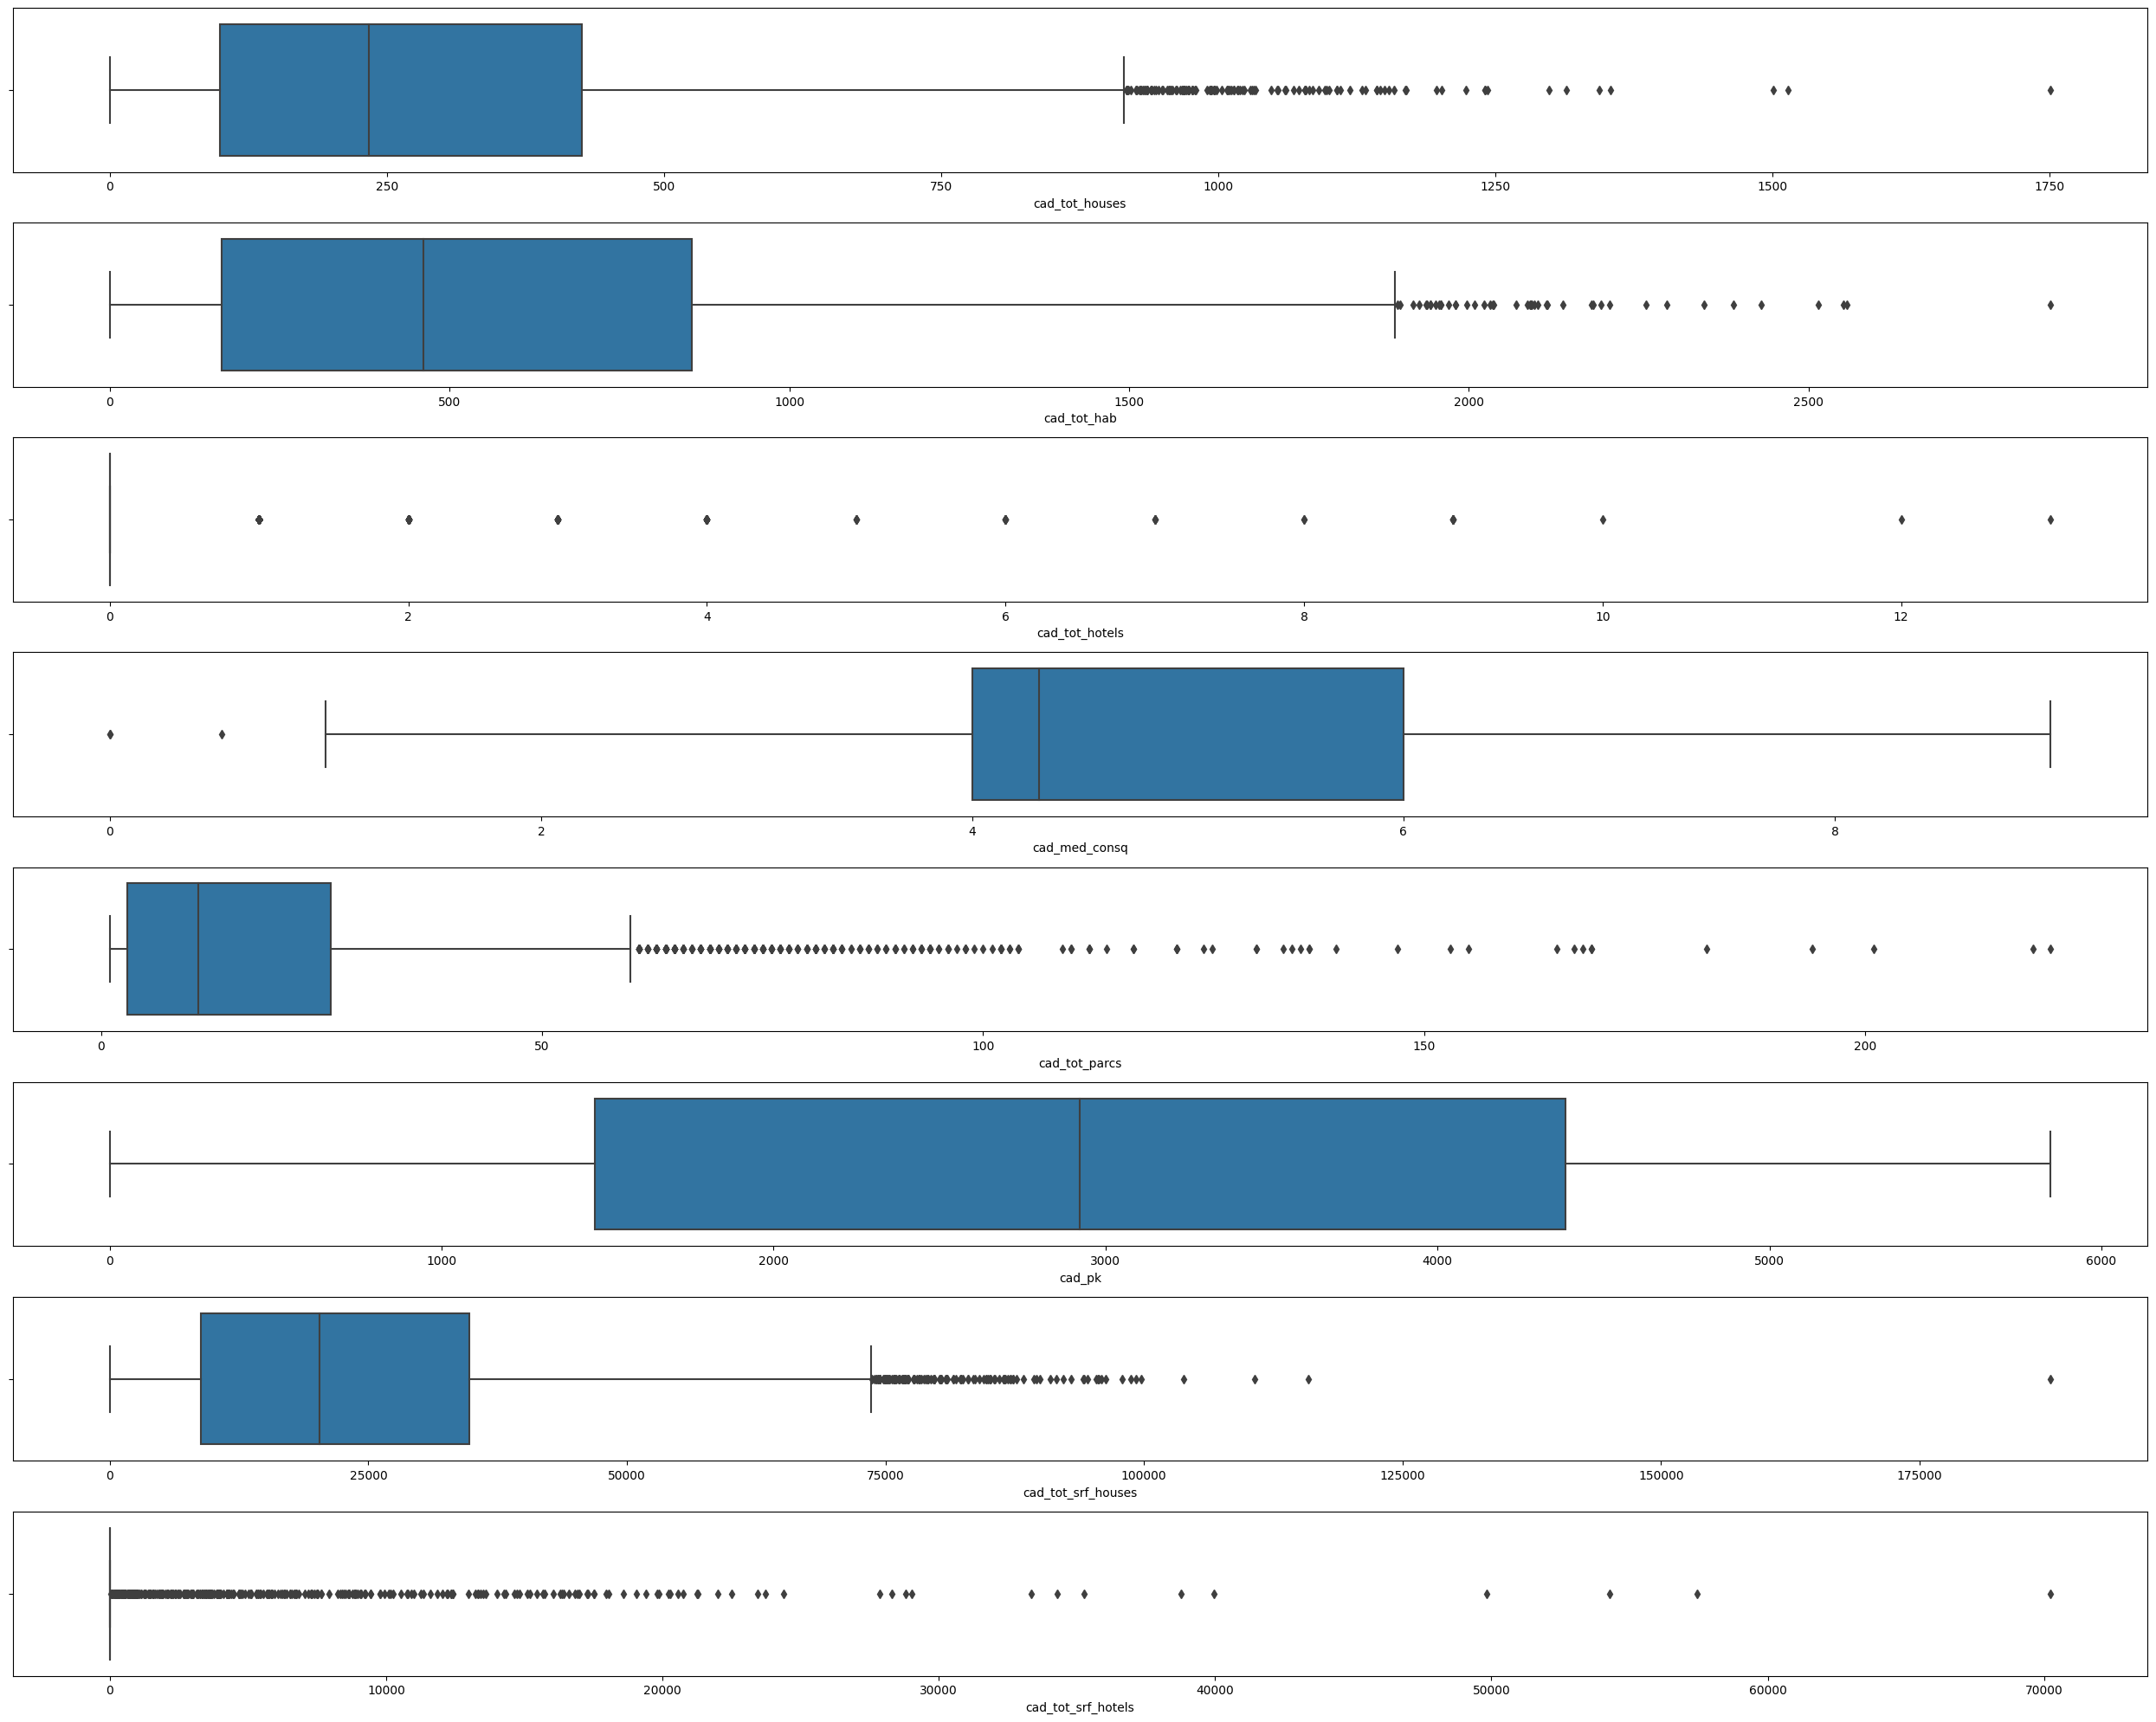

In [7]:
sc.chart_boxplot(df[cols_catastro])

In [8]:
df[cols_catastro].head()

,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0
2,317.0,826.0,0.0,4.25699,3.0,4843.0,32985.0,0.0
3,64.0,114.0,0.0,3.00000,2.0,4861.0,9200.0,0.0
4,33.0,11.0,0.0,4.00000,1.0,4882.0,4256.0,0.0


In [42]:
sc.analisis_basico(df[cols_catastro])

_________________________________

1_Data Structure: (12310, 8)


,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
0,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0
1,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cad_tot_houses      5846 non-null   float64
 1   cad_tot_hab         5846 non-null   float64
 2   cad_tot_hotels      5846 non-null   float64
 3   cad_med_consq       5846 non-null   float64
 4   cad_tot_parcs       5846 non-null   float64
 5   cad_pk              5846 non-null   float64
 6   cad_tot_srf_houses  5846 non-null   float64
 7   cad_tot_srf_hotels  5846 non-null   float64
dtypes: float64(8)
memory usage: 769.5 KB


None

_________________________________

2_Duplicated columns:
6463
_________________________________

3_Null values distribution:


,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
nulos,6464,6464,6464,6464,6464,6464,6464,6464
dtypes,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels
count,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000
mean,286.465446,555.183202,0.111187,4.590012,18.521040,2923.500000,23992.160965,420.108792
std,237.734644,460.057624,0.637806,1.438619,21.762561,1687.739168,19123.568684,2769.347873
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,99.250000,165.000000,0.000000,4.000000,3.000000,1462.250000,8806.500000,0.000000
50%,234.000000,461.000000,0.000000,4.310535,11.000000,2923.500000,20290.500000,0.000000
75%,426.000000,856.000000,0.000000,6.000000,26.000000,4384.750000,34741.500000,0.000000
max,1751.000000,2856.000000,13.000000,9.000000,221.000000,5846.000000,187651.000000,70227.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables de fotocasa

In [9]:
cols_fotocasa = scl.columnList(df, 'fc_')

the columns that have fc_ on their name are: ['fc_tot_offer', 'fc_tot_owners', 'fc_avg_price', 'rn_fc_med_price', 'rn_fc_max_price', 'rn_fc_offer', 'rn_fc_min_price', 'rn_fc_avg_price', 'rn_fc_tot_price']


numeric variables distribution


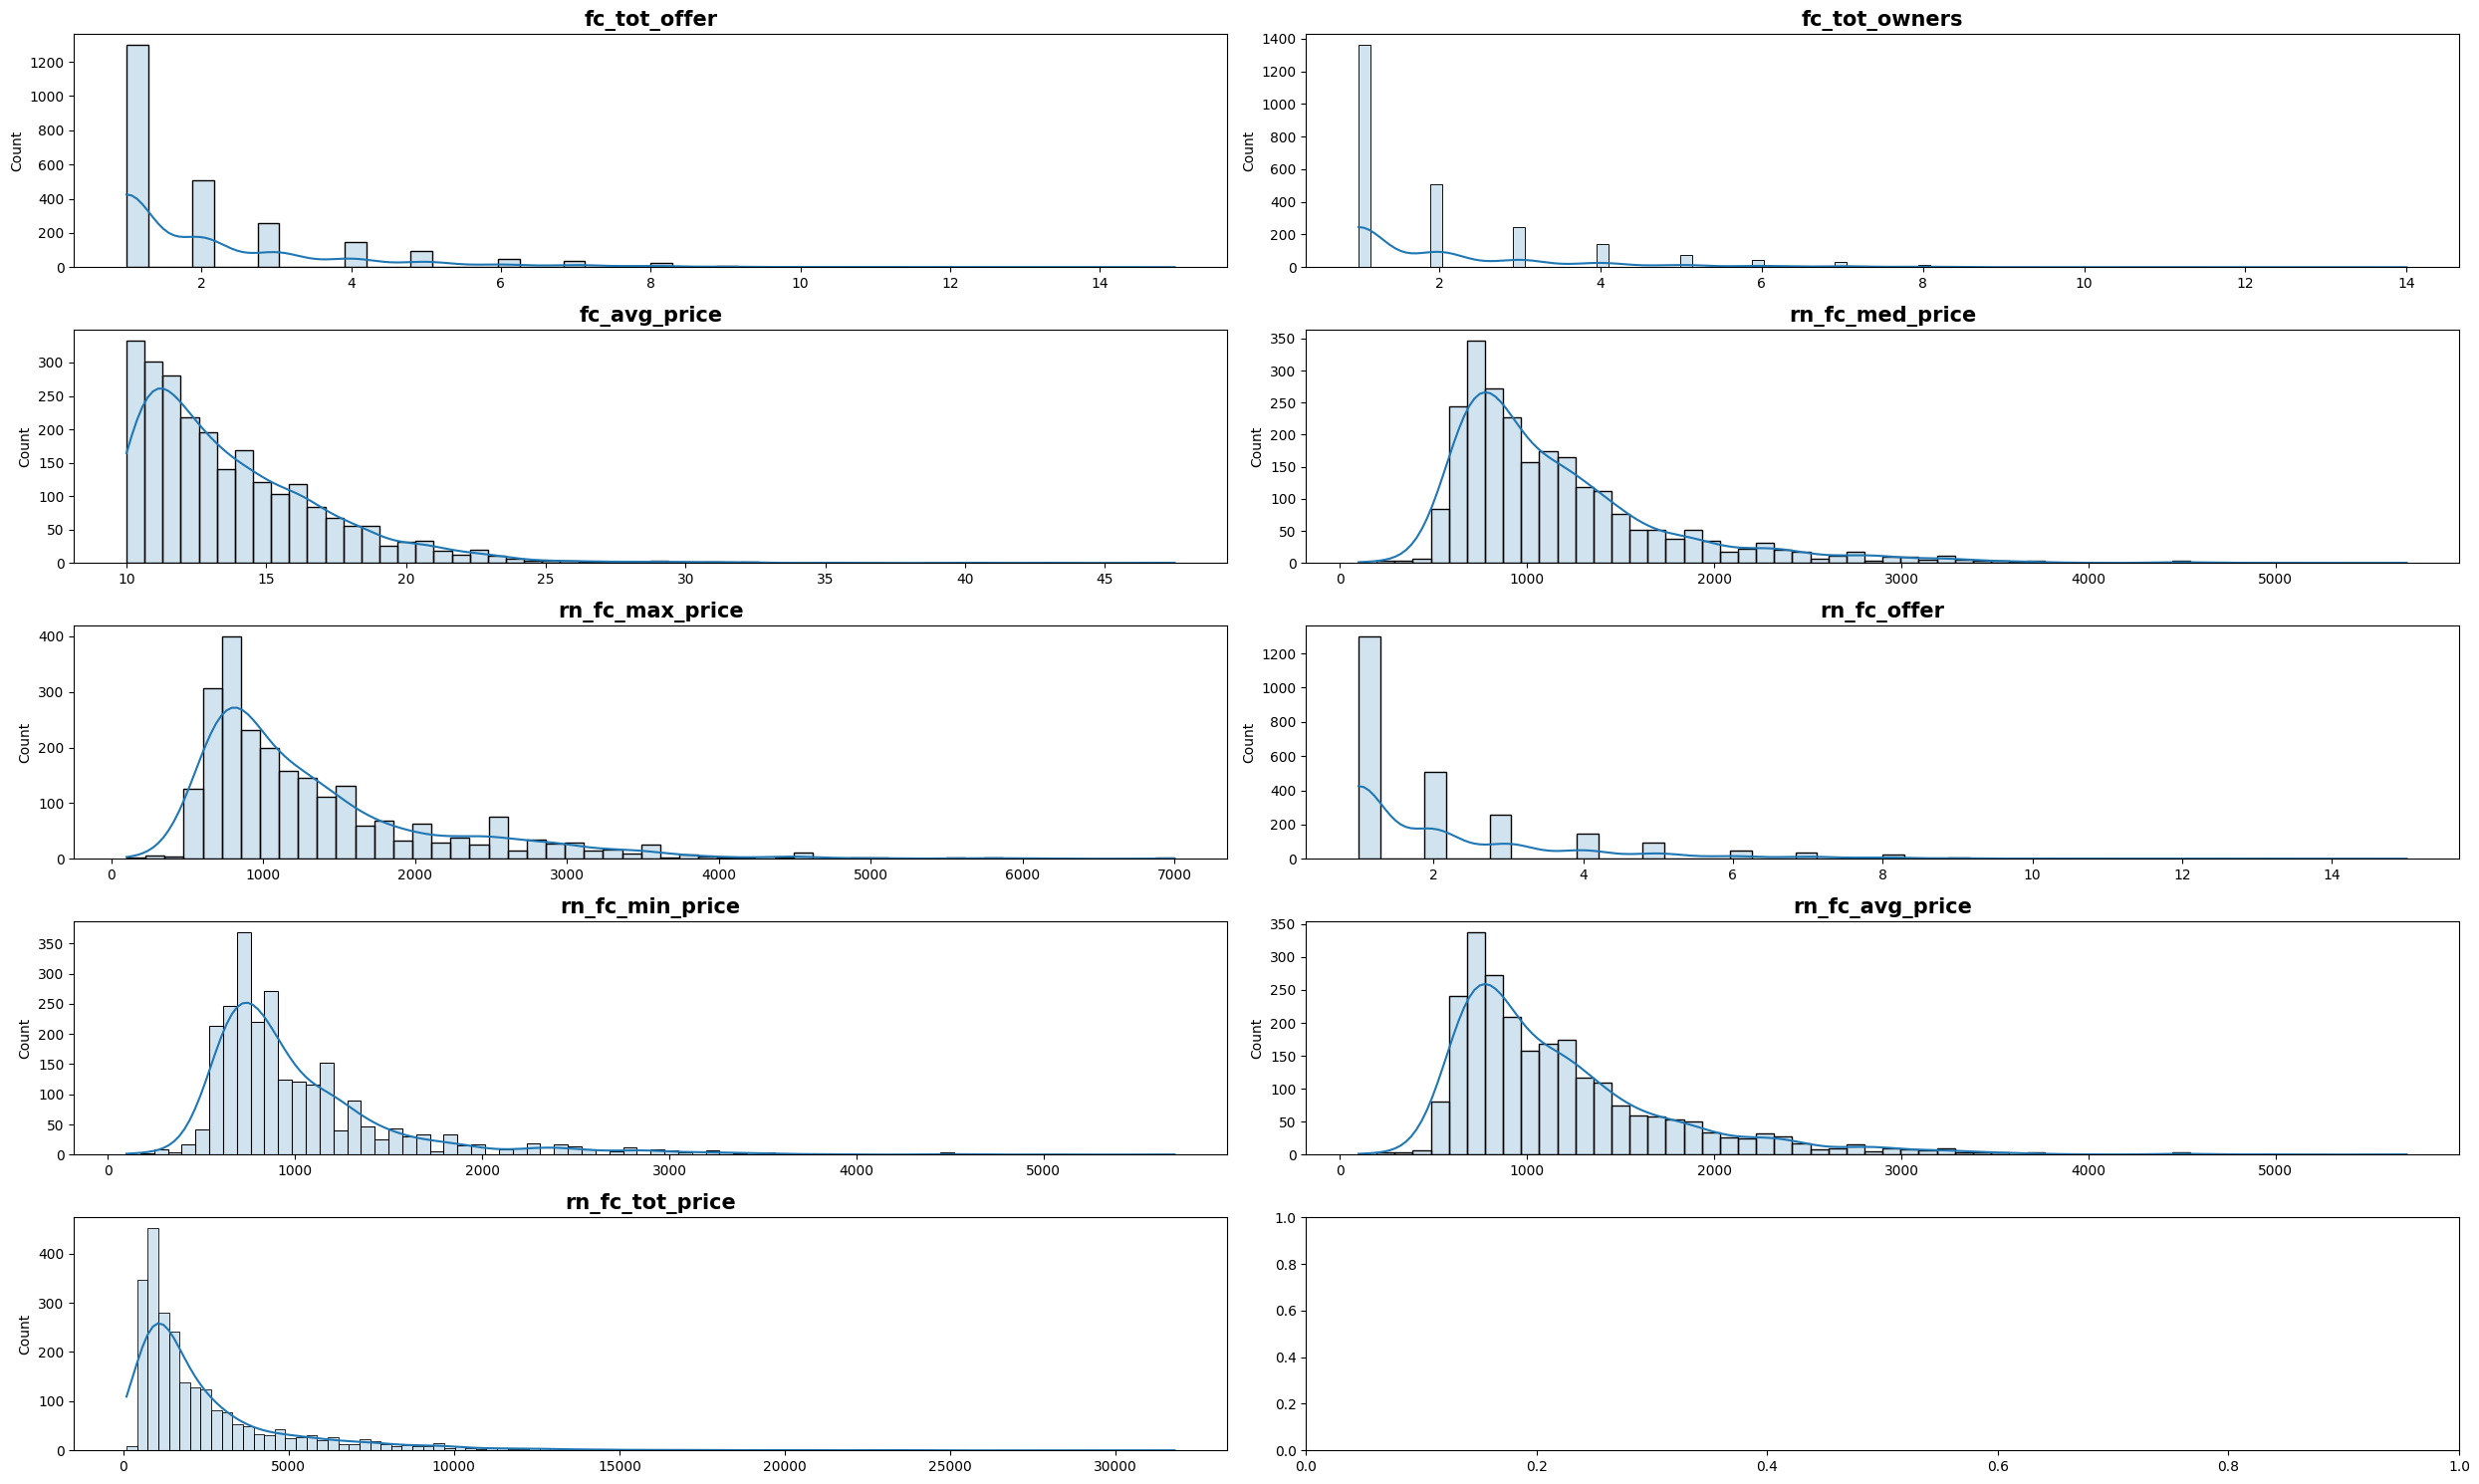

In [10]:
sc.distribucion_numericas(df[cols_fotocasa])

numeric variables distribution -> outliers


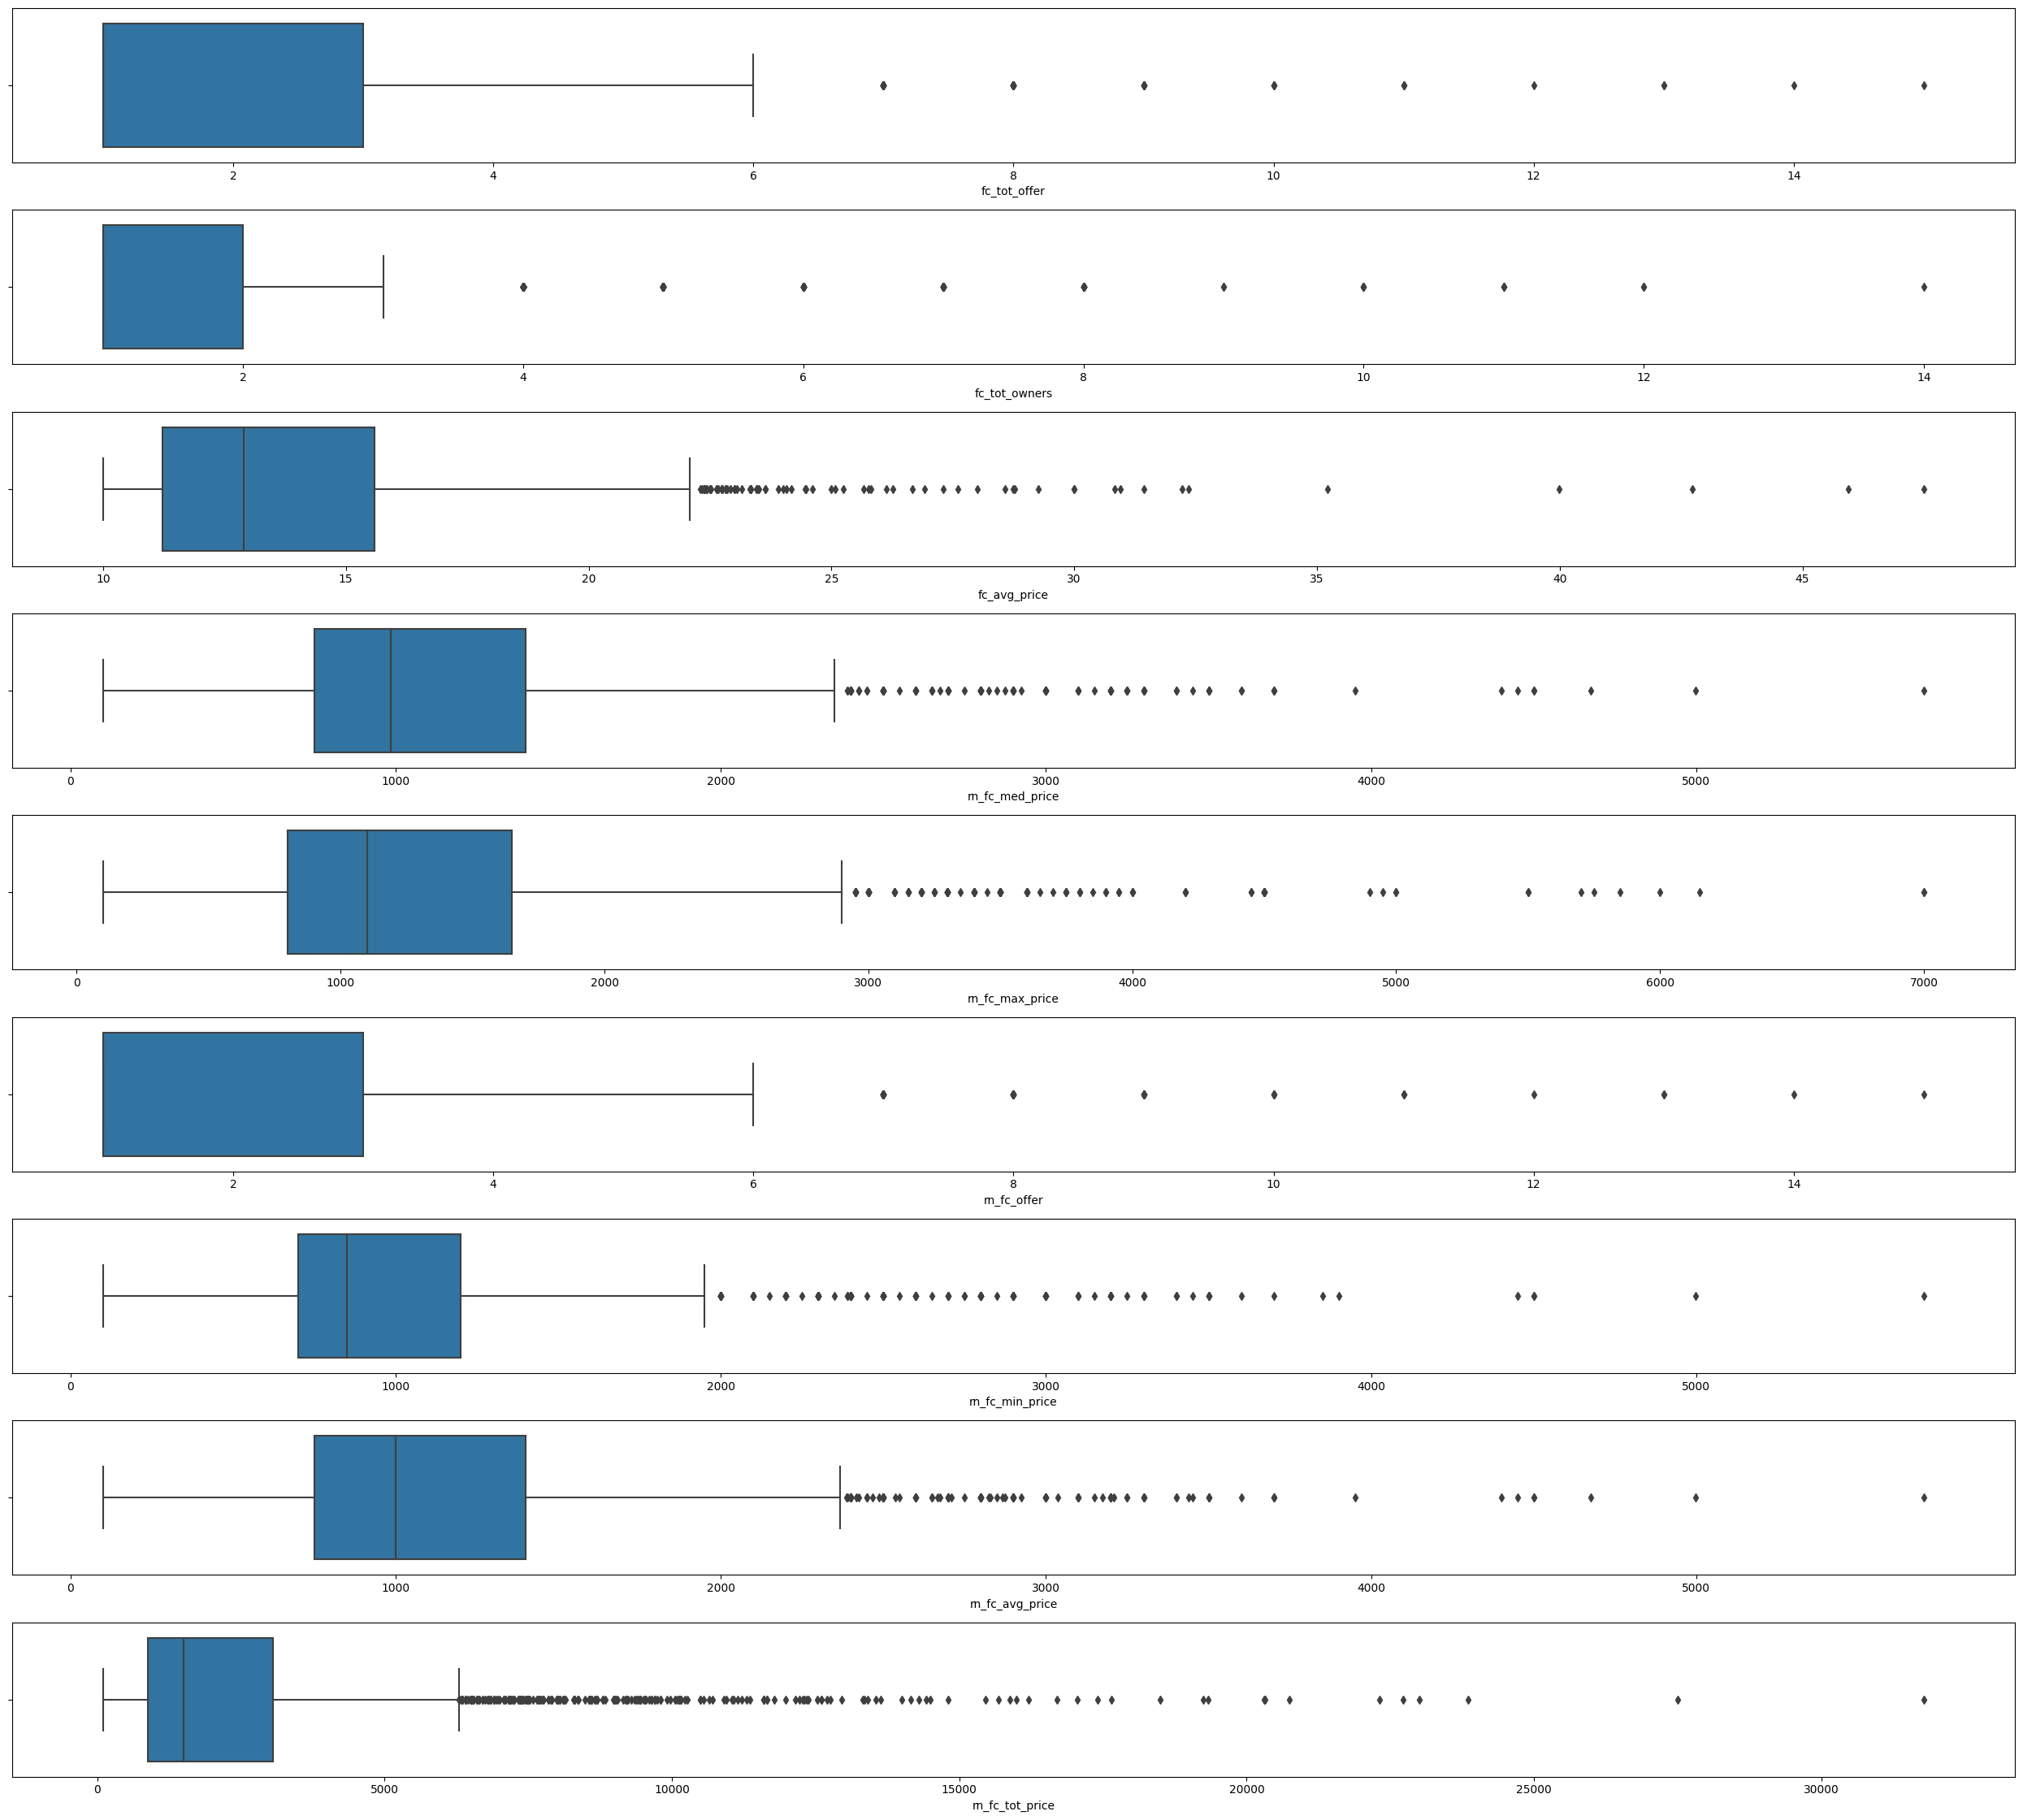

In [11]:
sc.chart_boxplot(df[cols_fotocasa])

In [12]:
sc.analisis_basico(df[cols_fotocasa])

_________________________________

1_Data Structure: (12310, 9)


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fc_tot_offer     2430 non-null   float64
 1   fc_tot_owners    2430 non-null   float64
 2   fc_avg_price     2430 non-null   float64
 3   rn_fc_med_price  2430 non-null   float64
 4   rn_fc_max_price  2430 non-null   float64
 5   rn_fc_offer      2430 non-null   float64
 6   rn_fc_min_price  2430 non-null   float64
 7   rn_fc_avg_price  2430 non-null   float64
 8   rn_fc_tot_price  2430 non-null   float64
dtypes: float64(9)
memory usage: 865.7 KB


None

_________________________________

2_Duplicated columns:
10430
_________________________________

3_Null values distribution:


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
nulos,9880,9880,9880,9880,9880,9880,9880,9880,9880
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_fc_min_price,rn_fc_avg_price,rn_fc_tot_price
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,2.090123,1.971605,13.840803,1166.326543,1366.224691,2.090123,1034.009053,1182.090159,2629.842387
std,1.702837,1.554425,3.628931,603.655959,839.009251,1.702837,551.179200,605.803317,2932.587574
min,1.000000,1.000000,10.000000,100.000000,100.000000,1.000000,100.000000,100.000000,100.000000
25%,1.000000,1.000000,11.219905,750.000000,800.000000,1.000000,700.000000,750.000000,885.000000
50%,1.000000,1.000000,12.894465,983.750000,1100.000000,1.000000,850.000000,1000.000000,1500.000000
75%,3.000000,2.000000,15.593654,1400.000000,1650.000000,3.000000,1200.000000,1400.000000,3050.000000
max,15.000000,14.000000,47.500000,5700.000000,7000.000000,15.000000,5700.000000,5700.000000,31785.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


the variables that come from Fotocasa, the real estate portal are:
- `fc_tot_offer` -> fotocasa total offers.
<br>number of listings. the mean value is around 2 in a given area.
- `fc_tot_owners` -> fotocasa total people that offer.
<br>the mean is a bit below 2 -> this variable shows how big tenants are.
- `fc_avg_price` -> avg listed price
<br>the average of the listings published on the area. The avg is a bit low, might be that the price is not in euros but in eurosqm.
- `rn_fc_med_price` -> median price? average price? there's no further description of this variable.
<br>seeing the values, might be the published price from the listings.
- `rn_fc_max_price` -> fotocasa max price on the area
<br>the mean is aorun 1300 euros -> it is the listed price
- `rn_fc_offer` -> number of offers.
<br>this field has the same values as `fc_tot_offer`, so it can be dropped.
- `rn_fc_min_price` -> minimum listed price.
<br> minimum price listed on the area. the average value is around 1000.
- `rn_fc_avg_price` -> average of the listed price.
<br>the average value of the listings in a given area.
- `rn_fc_tot_price` -> total price of the listings?

as we've seen above, there are a lot of null values, so we will try to replace this variable by another one in order to be able to compare.

# variables airbnb

In [13]:
cols_airbnb = scl.columnList(df, 'abnb')

the columns that have abnb on their name are: ['abnb_tot_beds', 'abnb_tot_hosts_listings', 'abnb_tot_price', 'abnb_tot_offer', 'abnb_tot_owners', 'abnb_pk', 'abnb_tot_reviews', 'abnb_tot_reviews_per_month']


numeric variables distribution


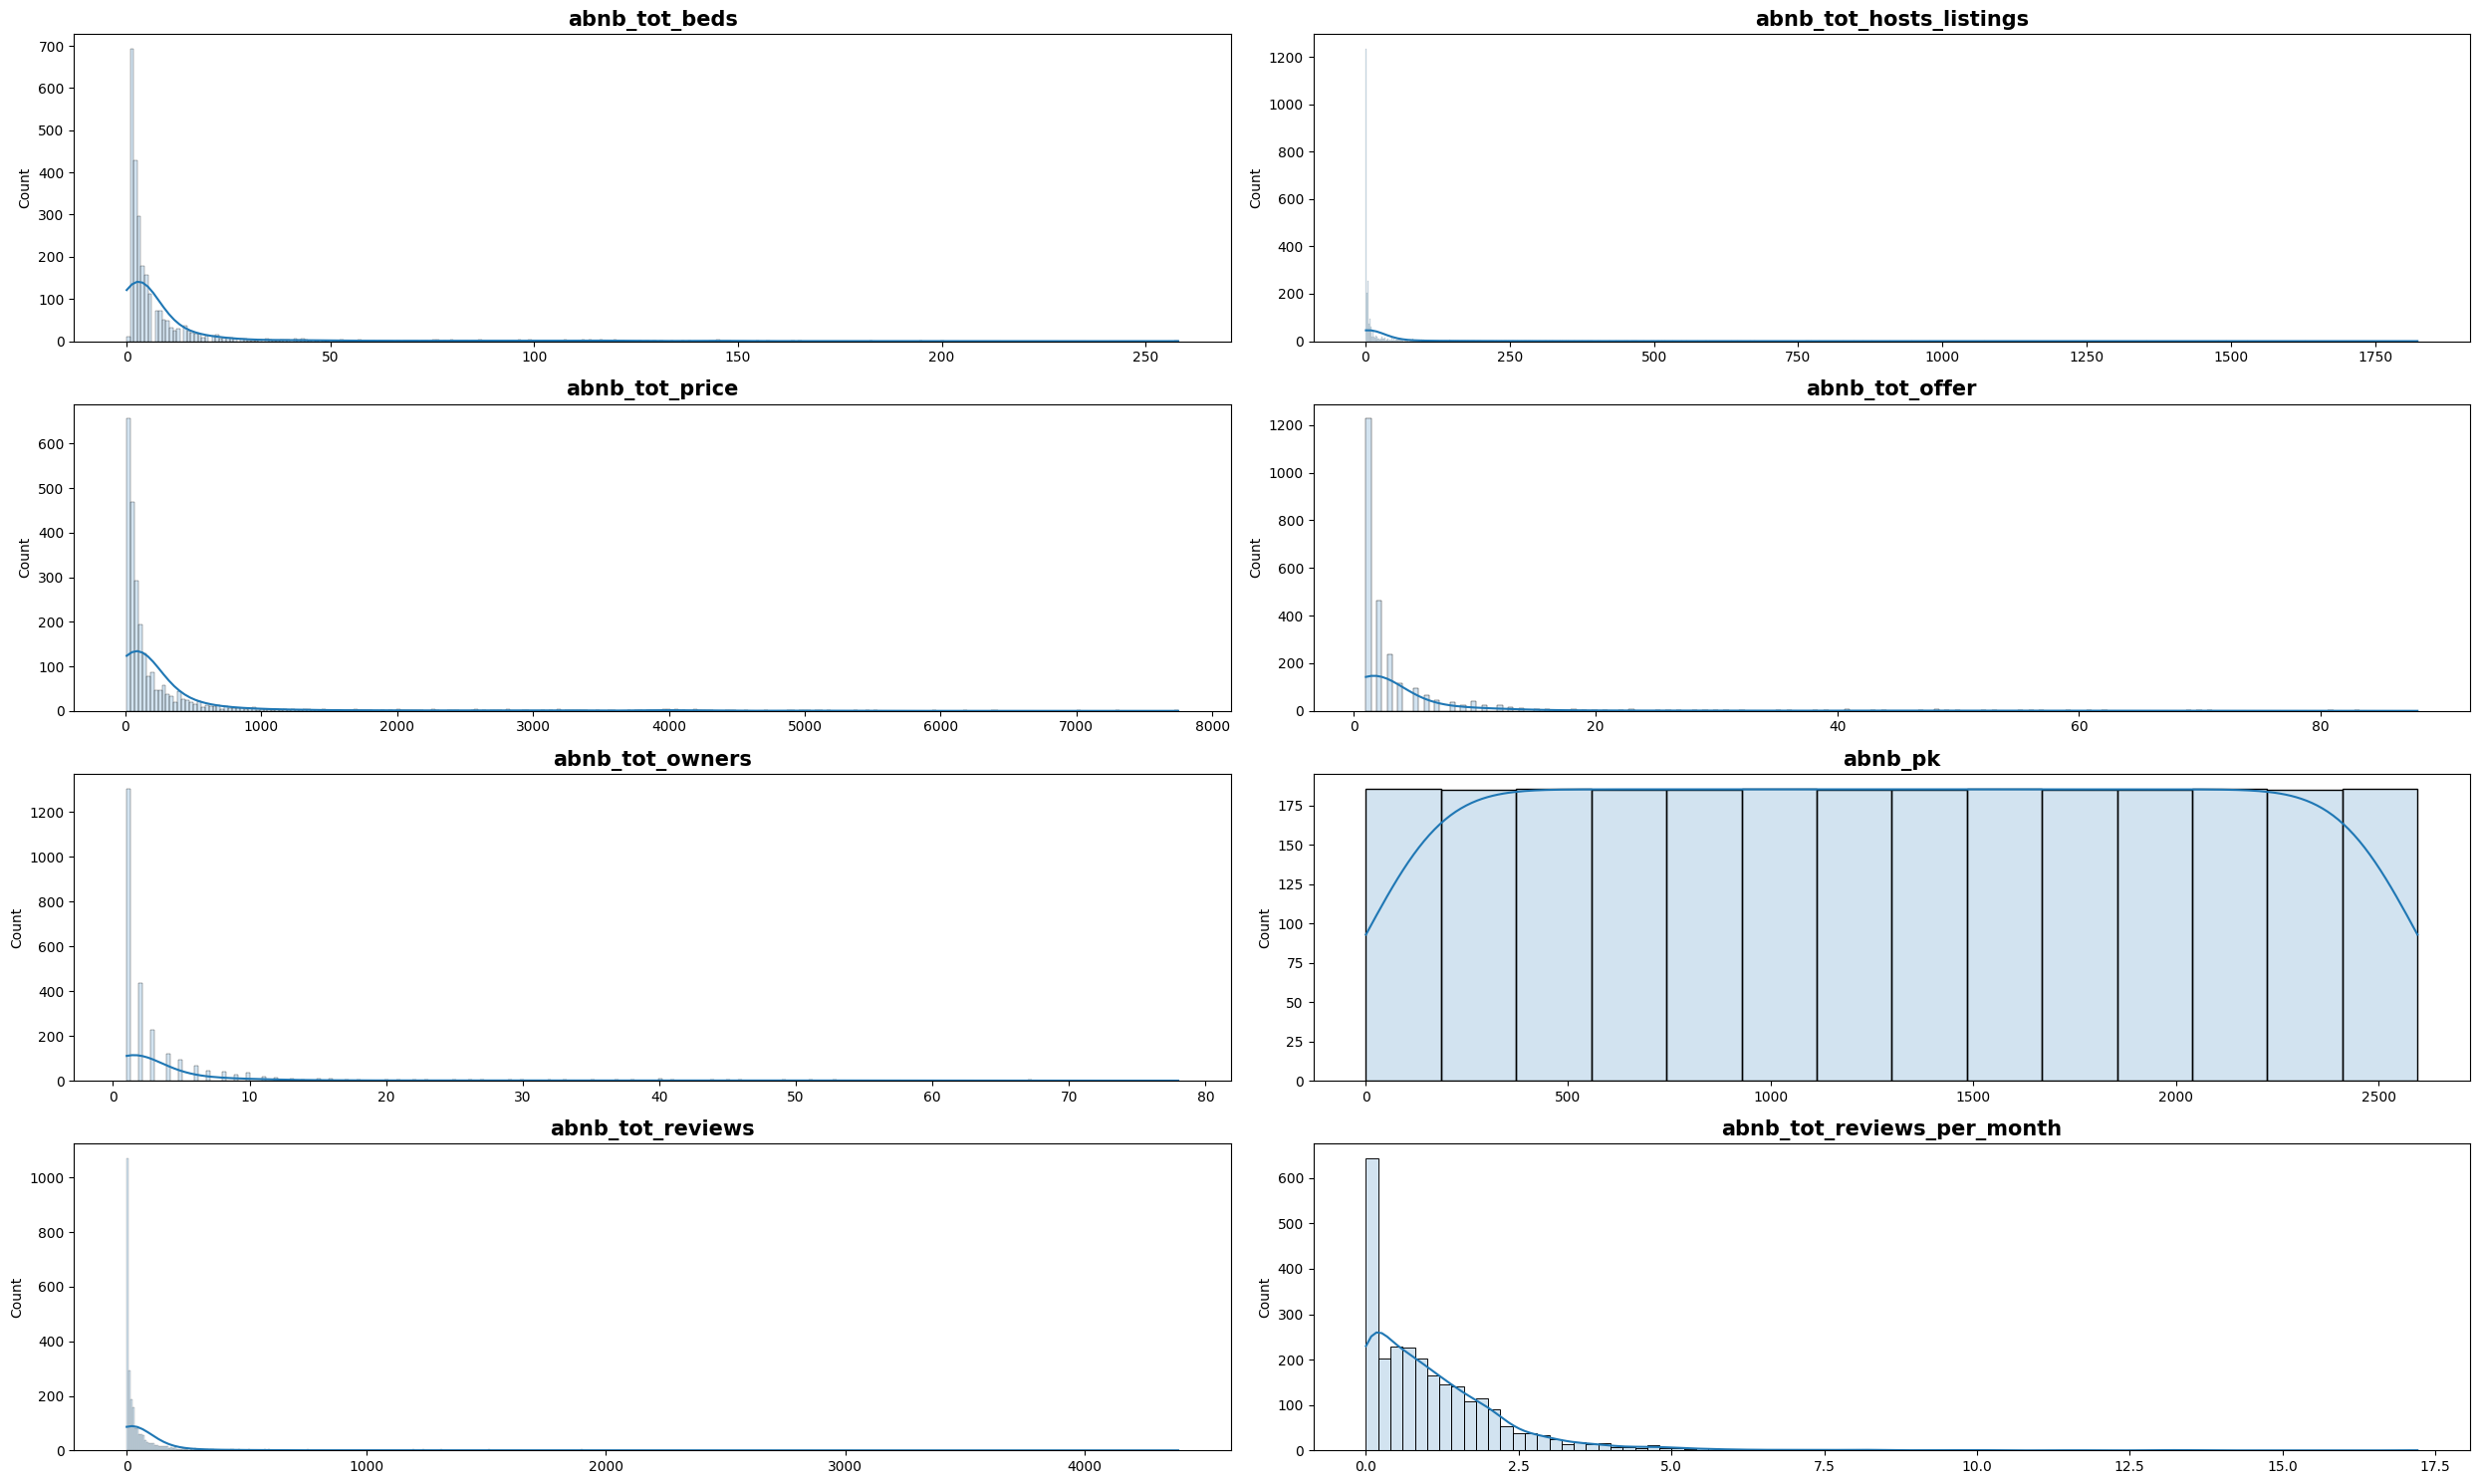

In [14]:
sc.distribucion_numericas(df[cols_airbnb])

numeric variables distribution -> outliers


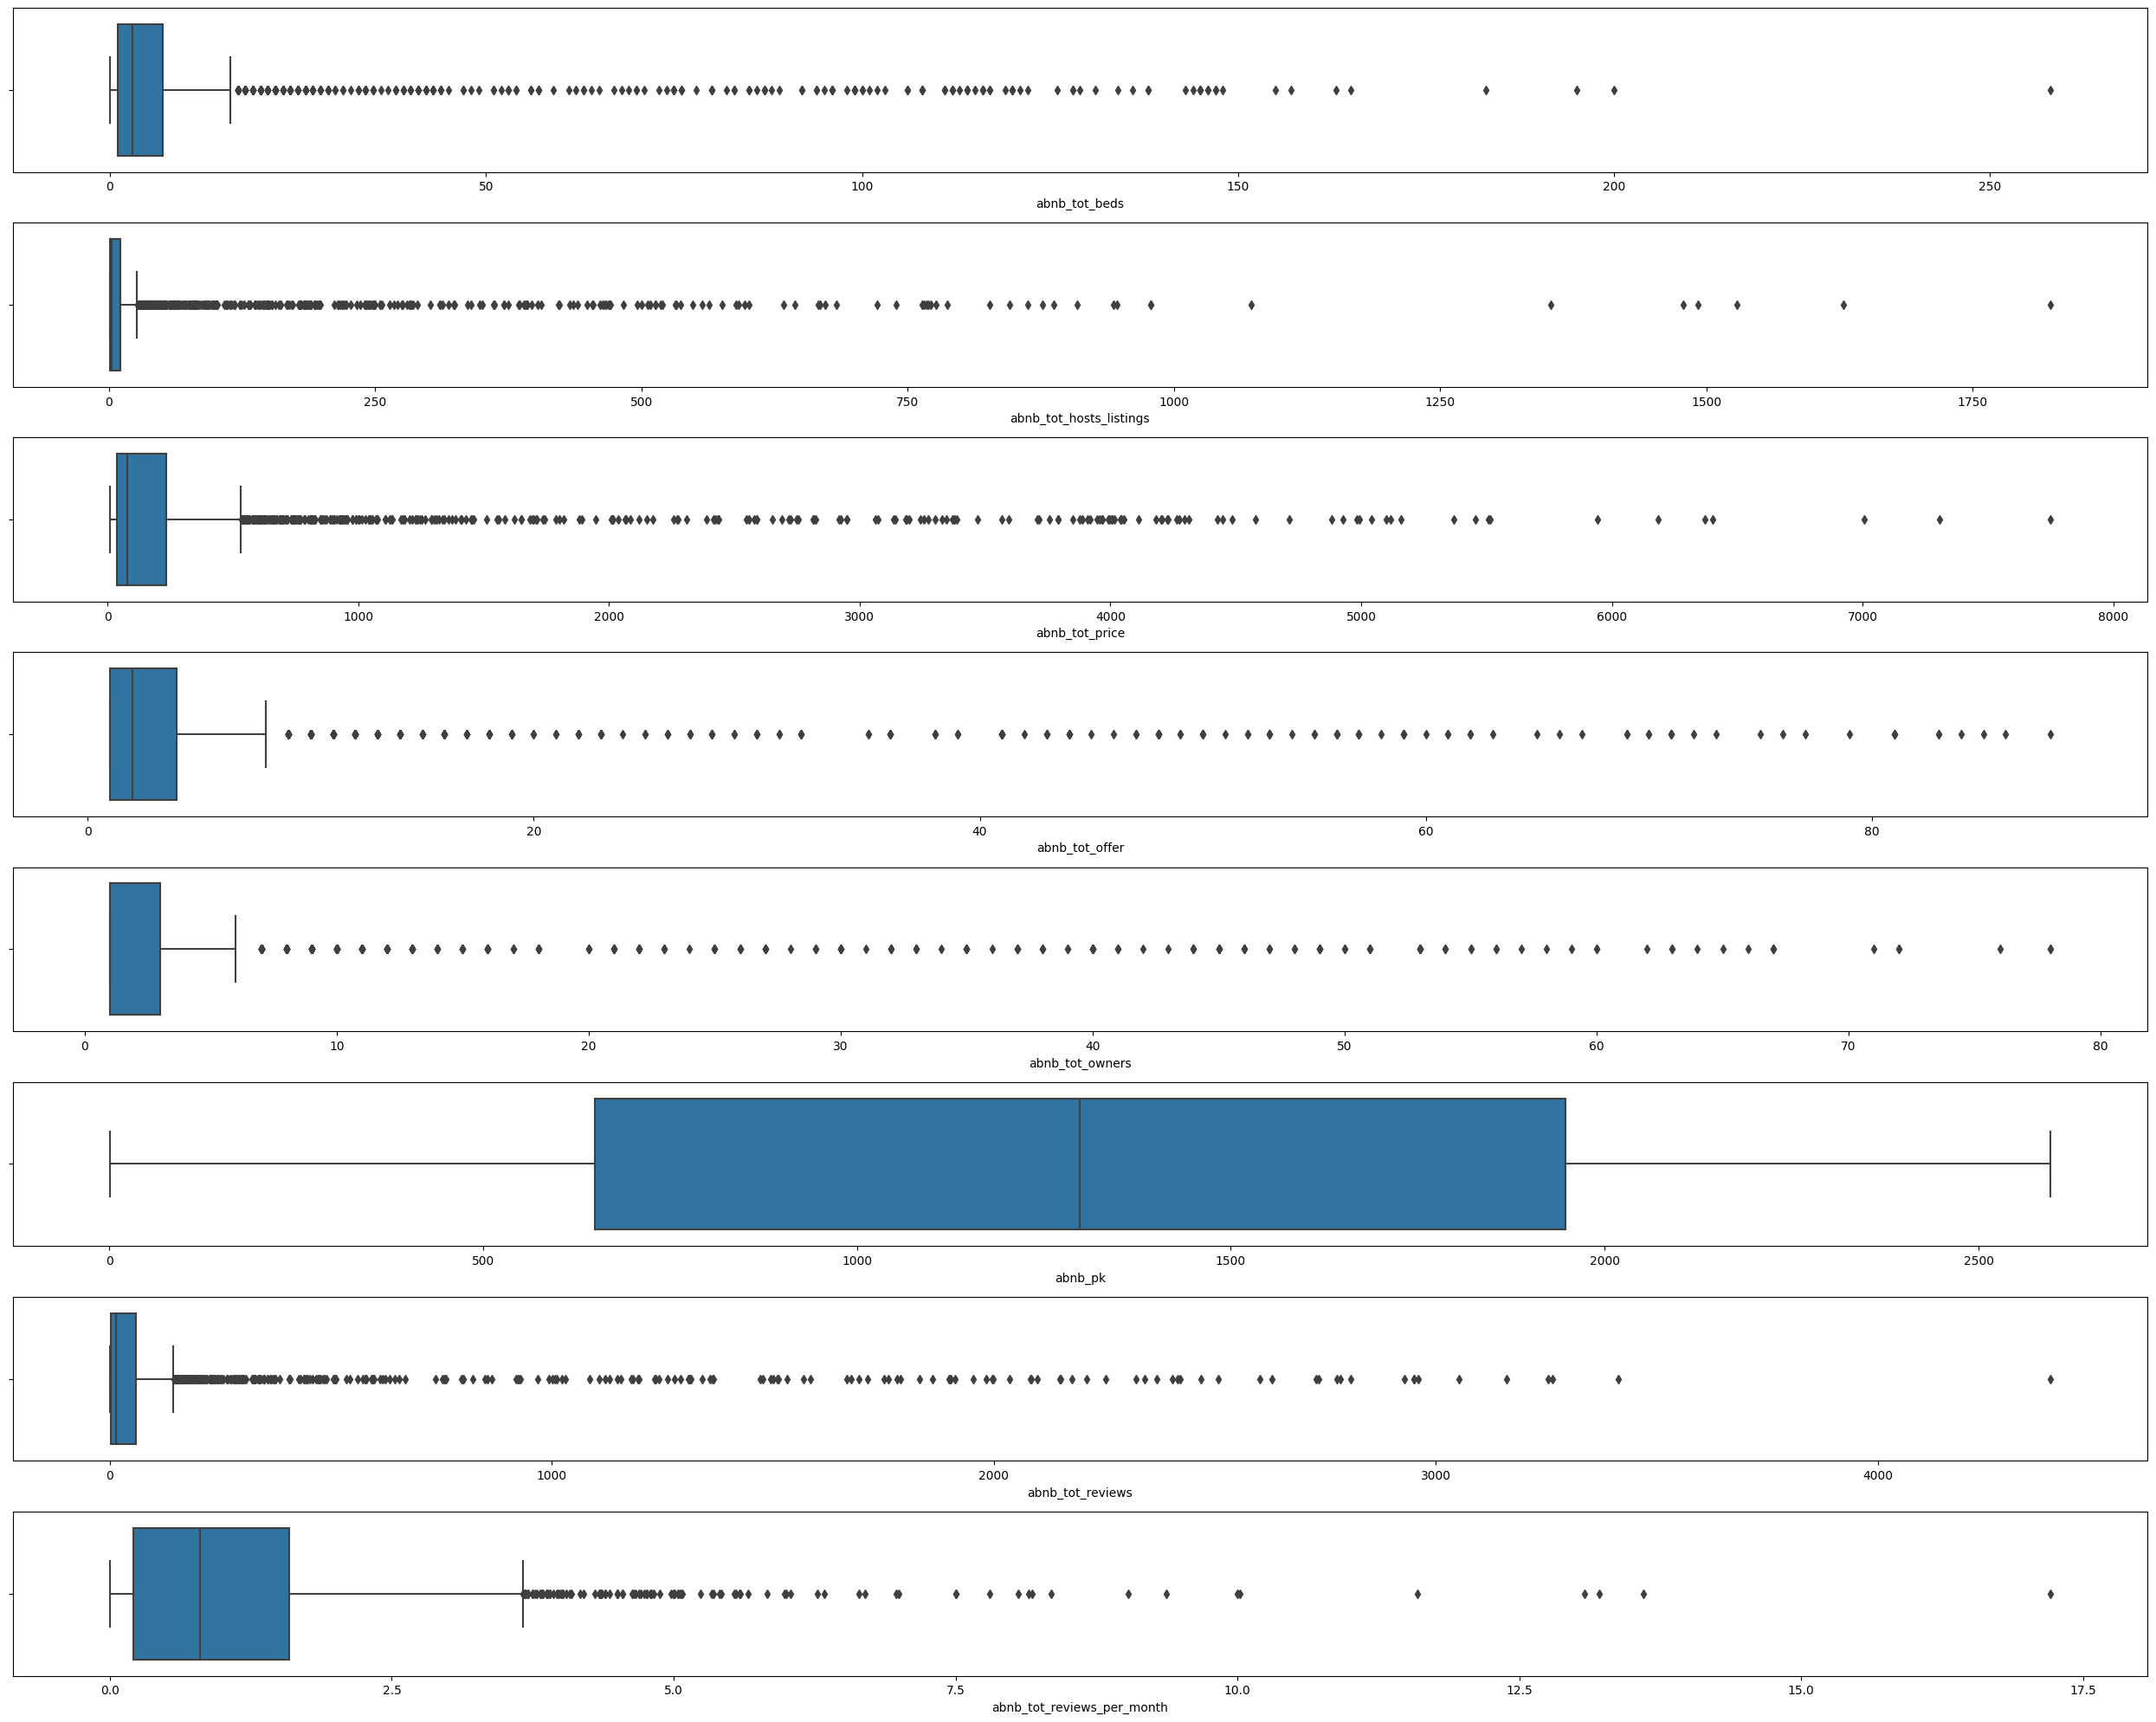

In [15]:
sc.chart_boxplot(df[cols_airbnb])

In [16]:
df[cols_airbnb].isnull().sum() / df[cols_airbnb].shape[0]

abnb_tot_beds                 0.789115
abnb_tot_hosts_listings       0.789115
abnb_tot_price                0.789115
abnb_tot_offer                0.789115
abnb_tot_owners               0.789115
abnb_pk                       0.789115
abnb_tot_reviews              0.789115
abnb_tot_reviews_per_month    0.789115
dtype: float64

In [17]:
sc.analisis_basico(df[cols_airbnb])

_________________________________

1_Data Structure: (12310, 8)


,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   abnb_tot_beds               2596 non-null   float64
 1   abnb_tot_hosts_listings     2596 non-null   float64
 2   abnb_tot_price              2596 non-null   float64
 3   abnb_tot_offer              2596 non-null   float64
 4   abnb_tot_owners             2596 non-null   float64
 5   abnb_pk                     2596 non-null   float64
 6   abnb_tot_reviews            2596 non-null   float64
 7   abnb_tot_reviews_per_month  2596 non-null   float64
dtypes: float64(8)
memory usage: 769.5 KB


None

_________________________________

2_Duplicated columns:
9713
_________________________________

3_Null values distribution:


,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month
nulos,9714,9714,9714,9714,9714,9714,9714,9714
dtypes,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,10.032357,38.729584,333.640986,5.110940,4.538521,1298.500000,117.921418,1.122026
std,22.818234,132.341347,804.092418,11.071463,9.459480,749.544973,380.873027,1.315348
min,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,37.000000,1.000000,1.000000,649.750000,2.000000,0.210000
50%,3.000000,3.000000,80.000000,2.000000,1.000000,1298.500000,14.000000,0.800000
75%,7.000000,11.000000,235.000000,4.000000,3.000000,1947.250000,59.000000,1.590667
max,258.000000,1823.000000,7749.000000,88.000000,78.000000,2596.000000,4390.000000,17.210000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


the variables that come form AirBNB are:
- `'abnb_tot_beds'` -> total numbers of beds available on the area.
<br>according to the area, it might be that some neighbothoods have more airbnb listings than other area. The median value is close to 0.
- `'abnb_tot_hosts_listings'` -> number of listings posted by host.
<br>the mean of the values posted are 38; the median is 3, meaning than there's a big chance that a host has more than one listing.
- `'abnb_tot_price'` -> aggregated price.
<br>mean price of the listings.
- `'abnb_tot_offer'` -> number of offers on the area.
<br>the mean is 5.
- `'abnb_tot_owners'` -> total number of owners in the area
- `'abnb_pk'` ->
- `'abnb_tot_reviews'` -> total number of reviews -> used to estimate the number of visitors.
<br>the mean is 227, the median is 14.
- `'abnb_tot_reviews_per_month'` -> avg of visits per month during the time the ad was listed
<br>the mean and the average are similar to 1.

# variables flickr

In [18]:
cols_flickr = scl.columnList(df, 'fl_')

the columns that have fl_ on their name are: ['fl_n_tourists', 'fl_n_locals', 'fl_txt_madrid', 'fl_n_date', 'fl_n_user', 'fl_n_posts', 'fl_tag_madrid']


numeric variables distribution


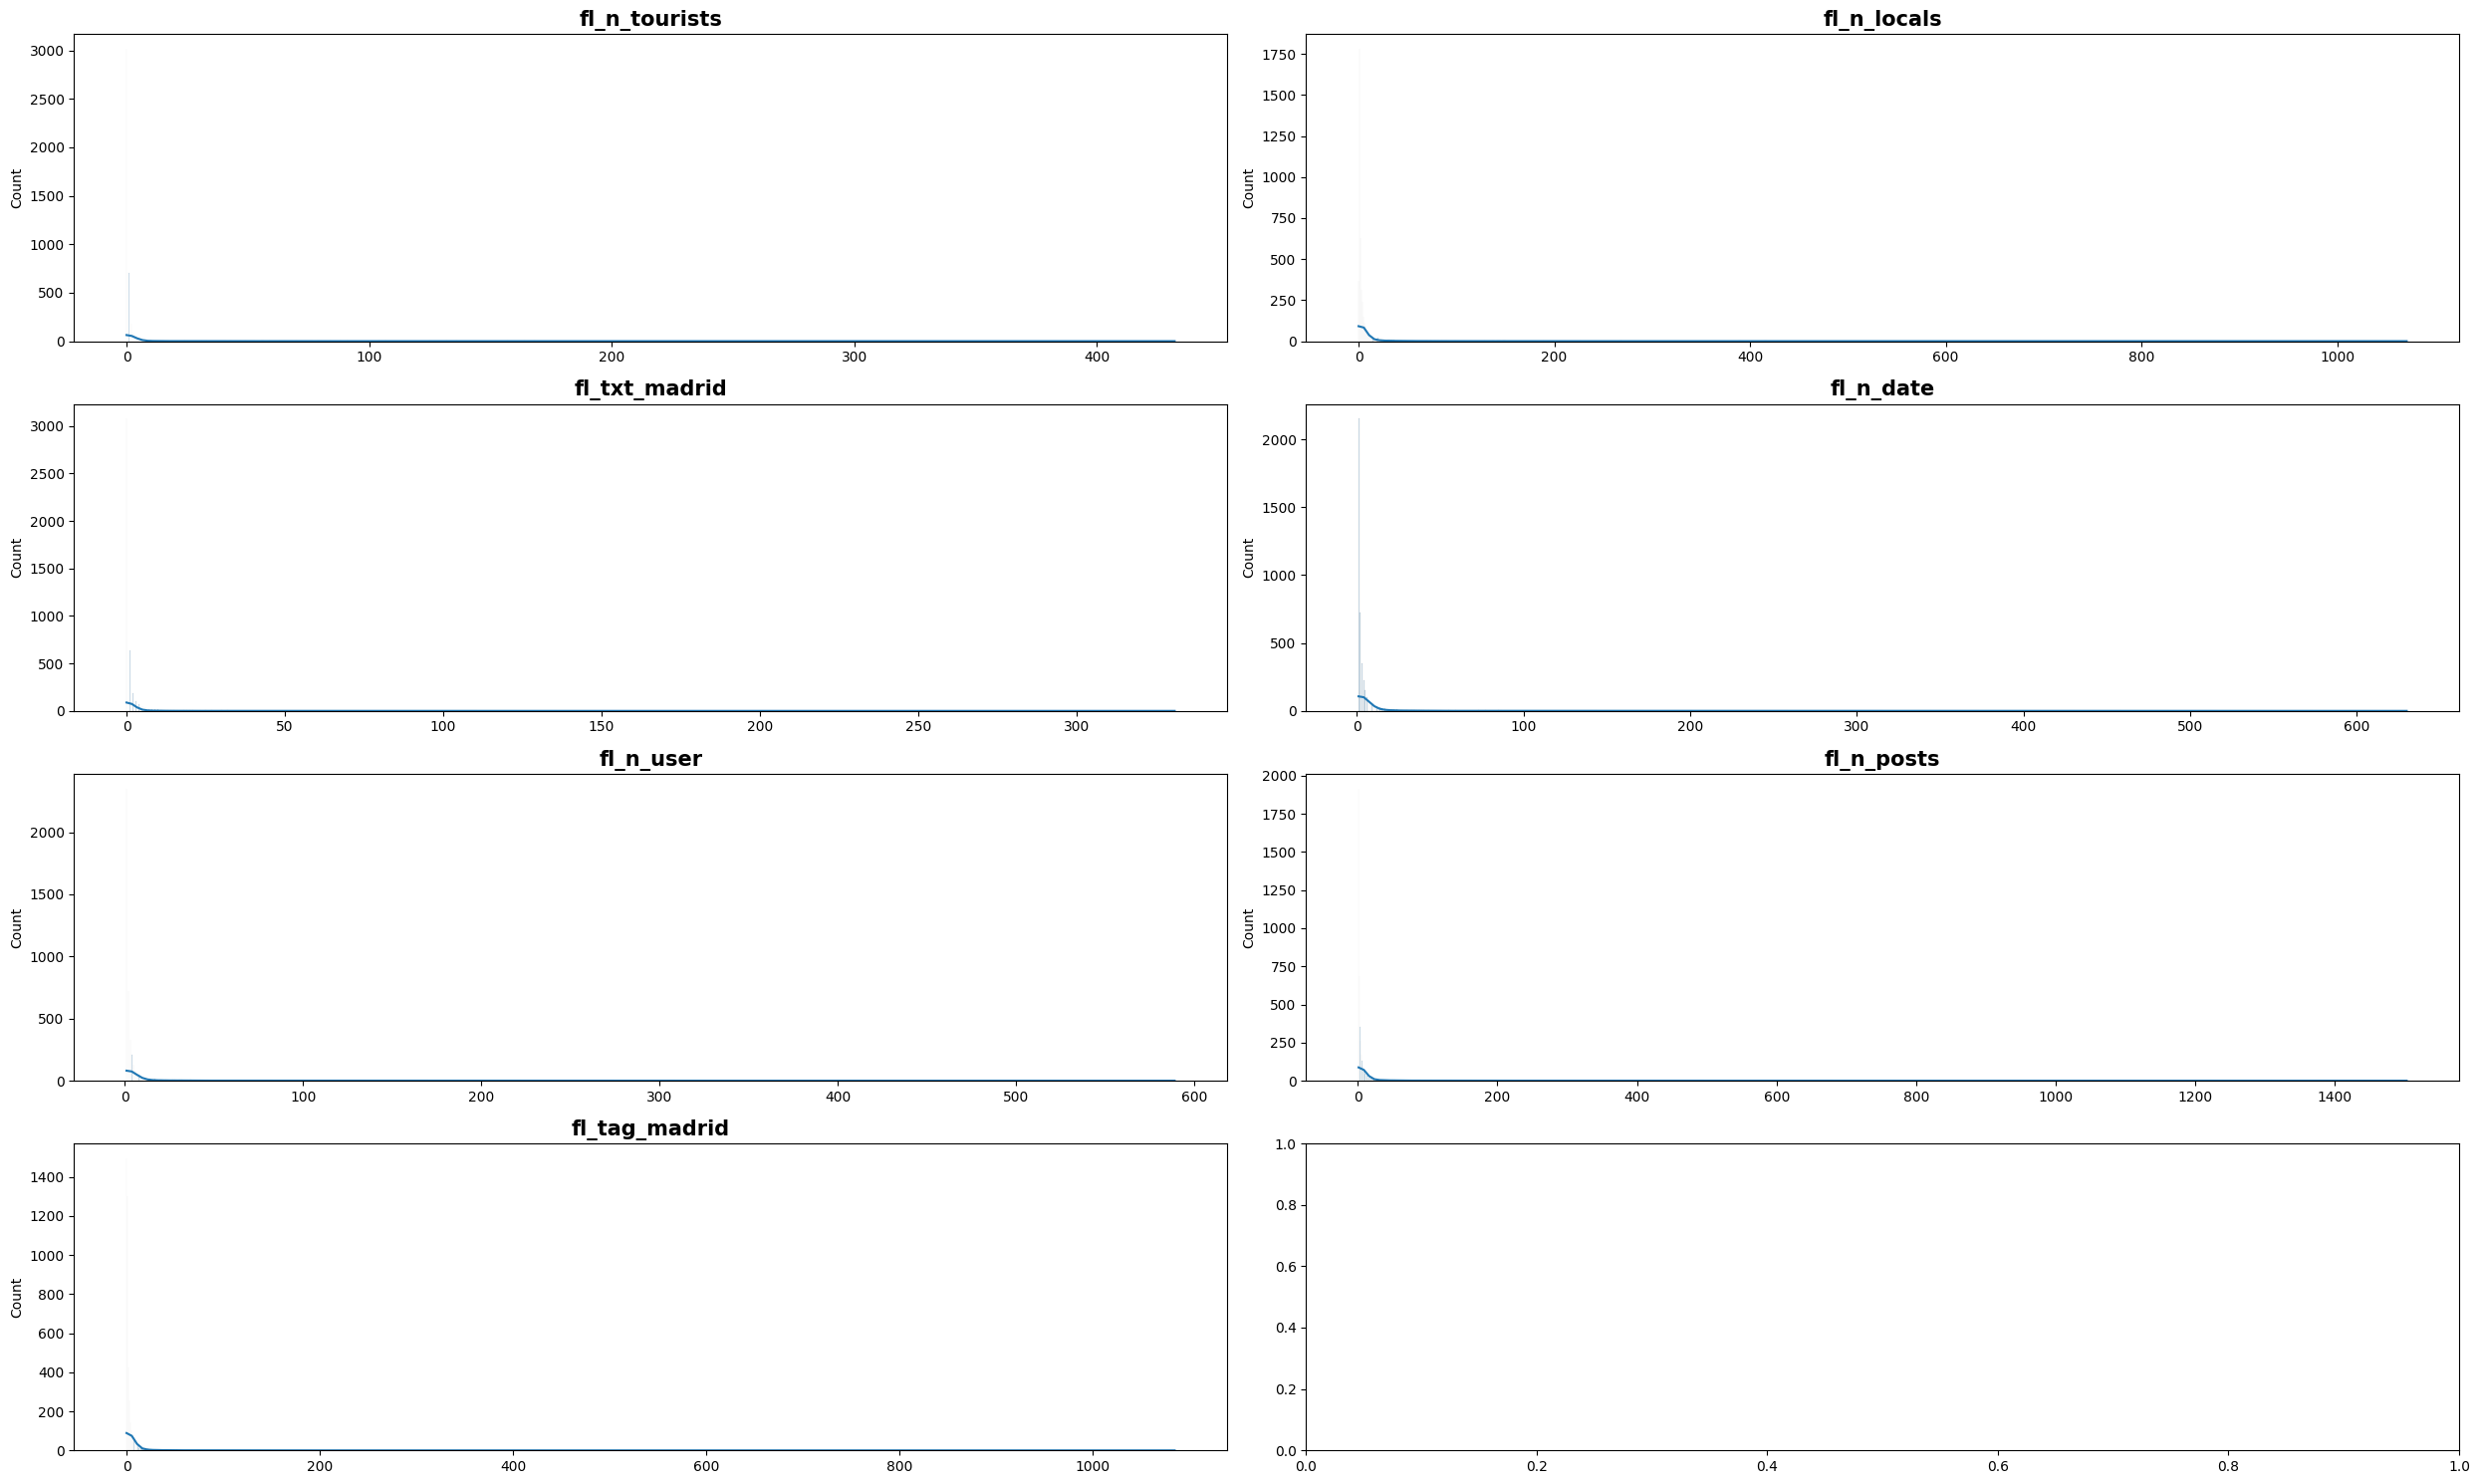

In [19]:
sc.distribucion_numericas(df[cols_flickr])

numeric variables distribution -> outliers


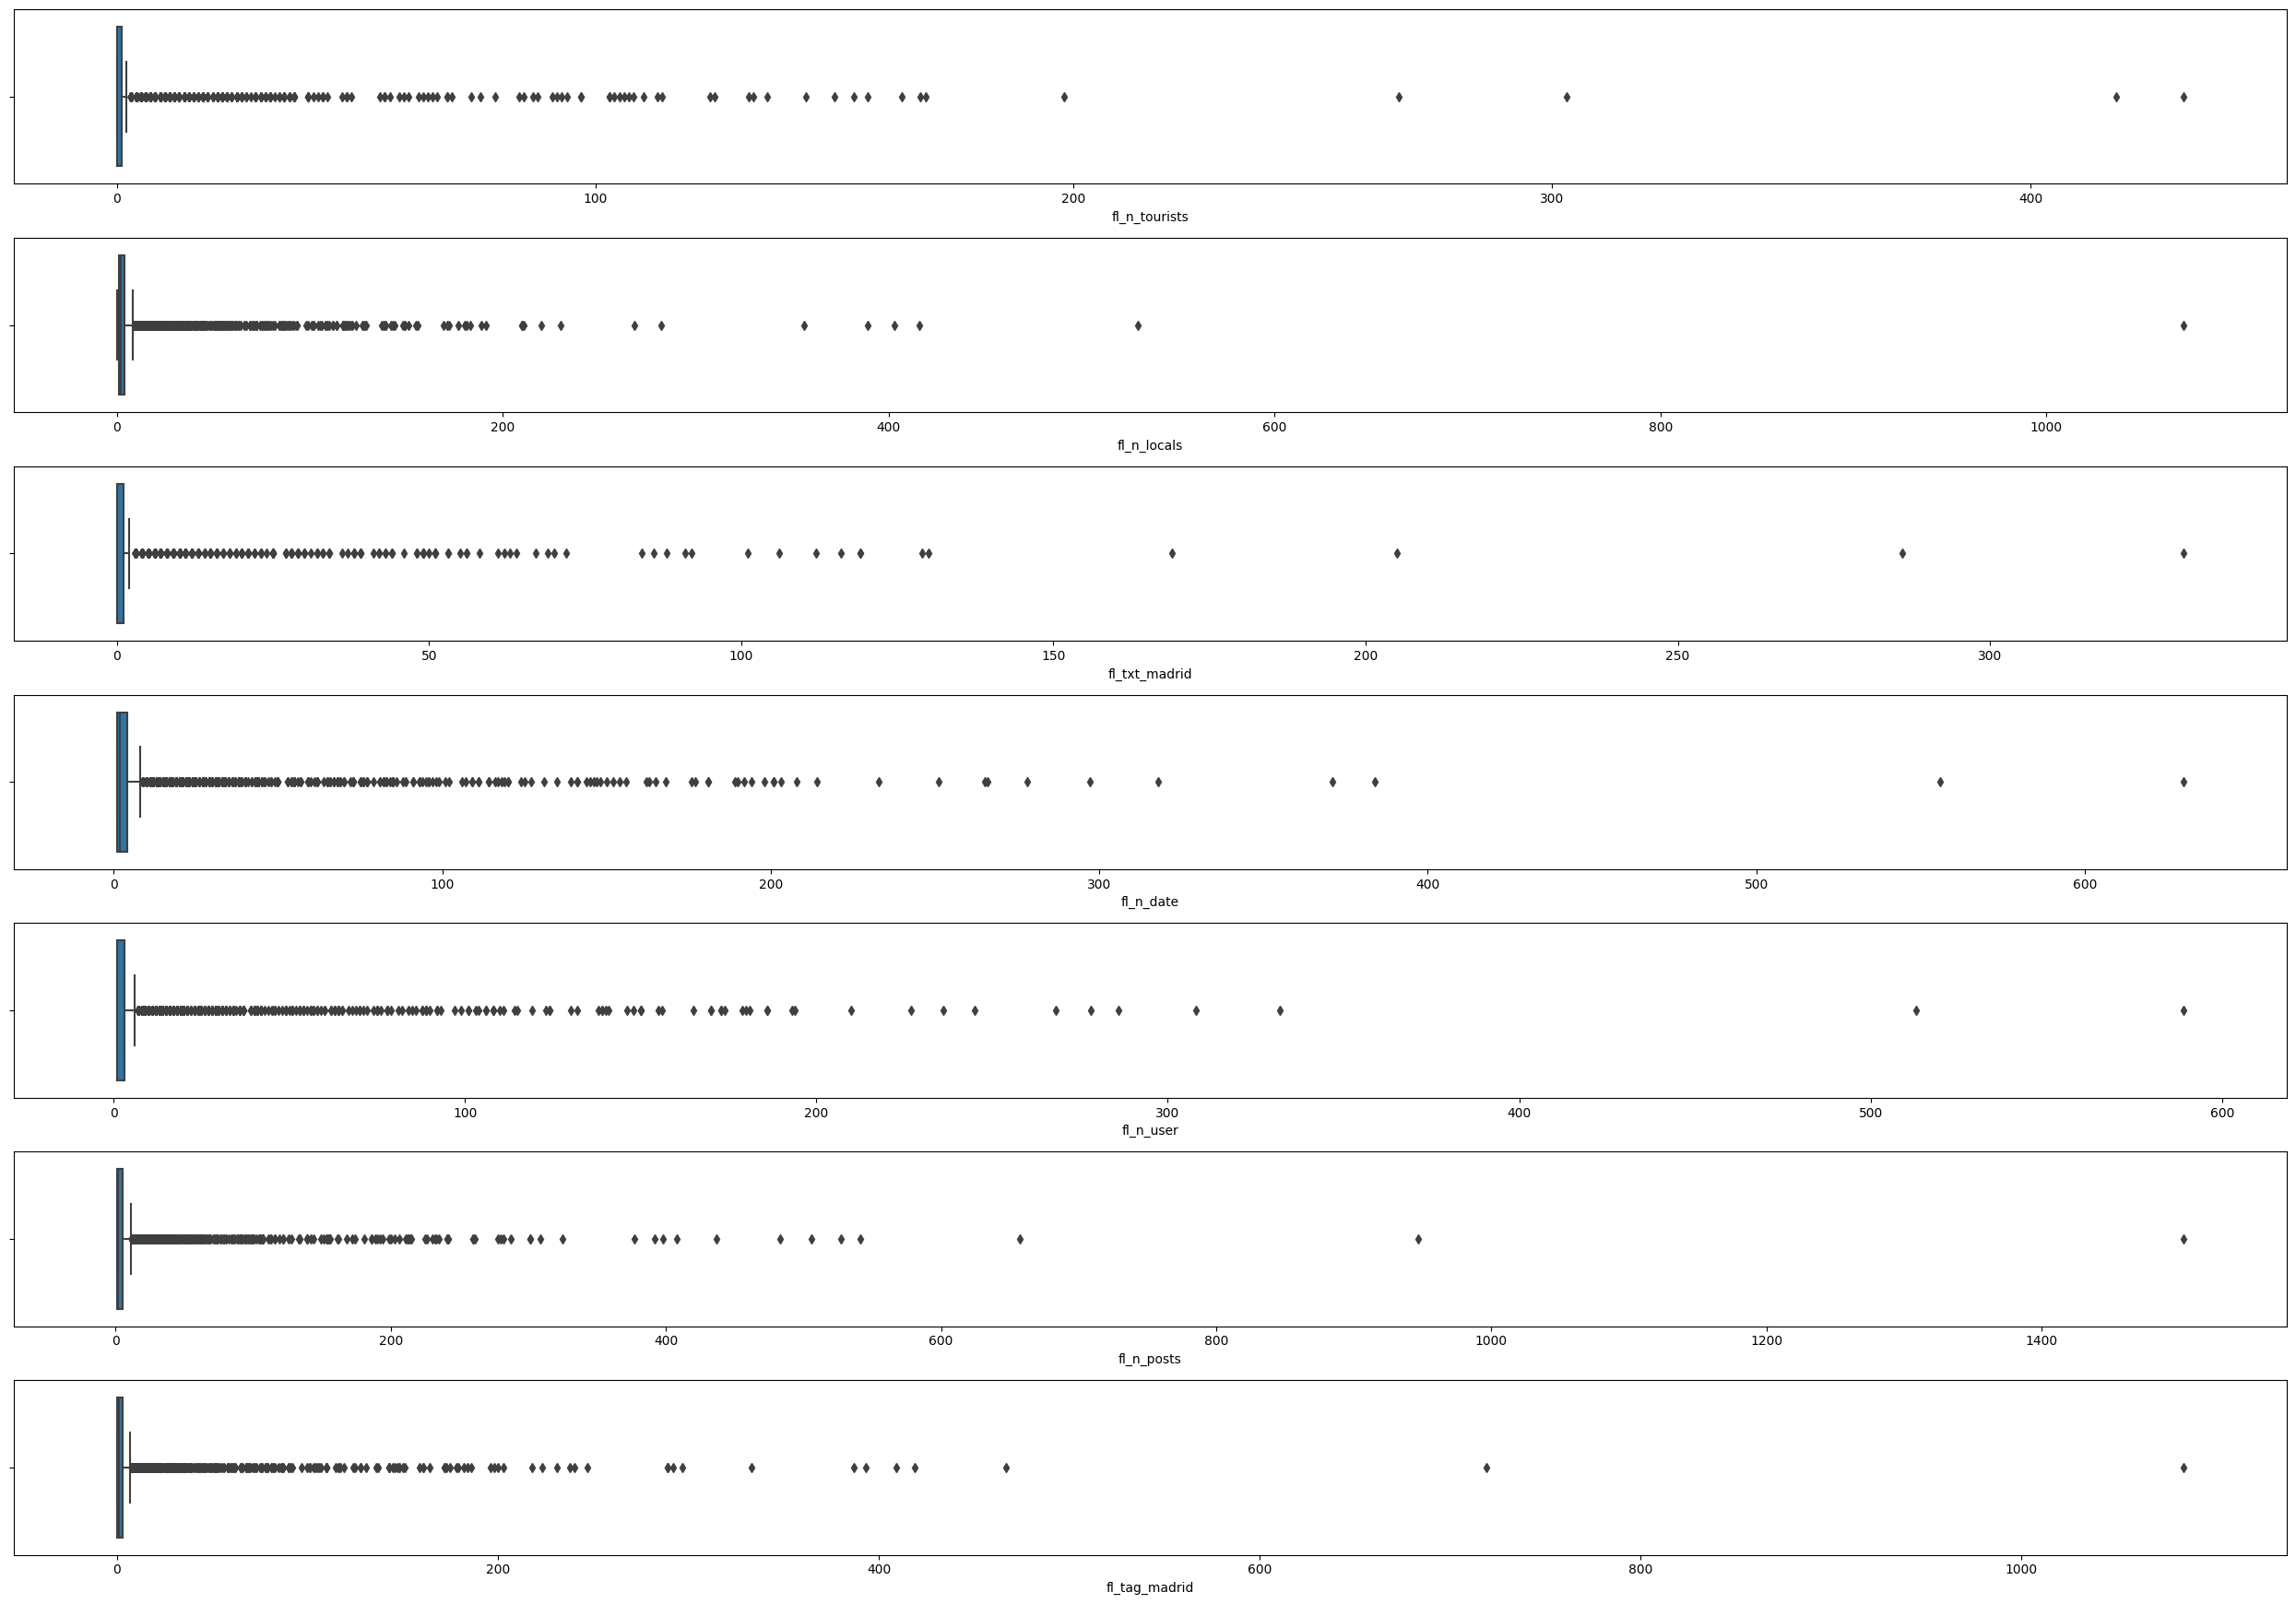

In [20]:
sc.chart_boxplot(df[cols_flickr])

In [21]:
sc.analisis_basico(df[cols_flickr])

_________________________________

1_Data Structure: (12310, 7)


,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fl_n_tourists  4385 non-null   float64
 1   fl_n_locals    4385 non-null   float64
 2   fl_txt_madrid  4385 non-null   float64
 3   fl_n_date      4385 non-null   float64
 4   fl_n_user      4385 non-null   float64
 5   fl_n_posts     4385 non-null   float64
 6   fl_tag_madrid  4385 non-null   float64
dtypes: float64(7)
memory usage: 673.3 KB


None

_________________________________

2_Duplicated columns:
10968
_________________________________

3_Null values distribution:


,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid
nulos,7925,7925,7925,7925,7925,7925,7925
dtypes,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid
count,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000
mean,2.806613,7.857925,2.100798,7.487571,6.541619,10.664538,7.015964
std,16.294661,29.385962,11.288695,26.527588,23.937374,44.344309,32.833094
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,4.000000,1.000000,4.000000,3.000000,5.000000,3.000000
max,432.000000,1071.000000,331.000000,630.000000,589.000000,1503.000000,1085.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


the variables that come form the Spanish Cadaster are:
- `'fl_n_tourists'` -> number of phots made by tourists
- `'fl_n_locals'` -> number of photos made by local residents
<br>there are more number of post made by locals than by tourists.
- `'fl_txt_madrid'` -> number of photos with the description `madrid`
- `'fl_n_date'` ->
- `'fl_n_user'` -> number of distinct users
- `'fl_n_posts'` -> number of posts
- `'fl_tag_madrid'` -> number of photos with the tag `madrid`
<br>there are more photos tagged as `madrid` as there are more photos with `madrid` on the description.

# variables hoteles

In [22]:
cols_hoteles = scl.columnList(df, 'h_')

the columns that have h_ on their name are: ['h_cat3cod', 'h_id', 'h_web', 'h_title', 'h_zipcode', 'h_latitude', 'h_email', 'h_body', 'h_fax', 'h_phone', 'h_cat3txt', 'h_subadministrativearea', 'h_address', 'h_cat1txt', 'h_cat2txt', 'h_name', 'h_language', 'h_cat2cod', 'h_country', 'h_locality', 'h_longitude', 'h_cat1cod']


numeric variables distribution


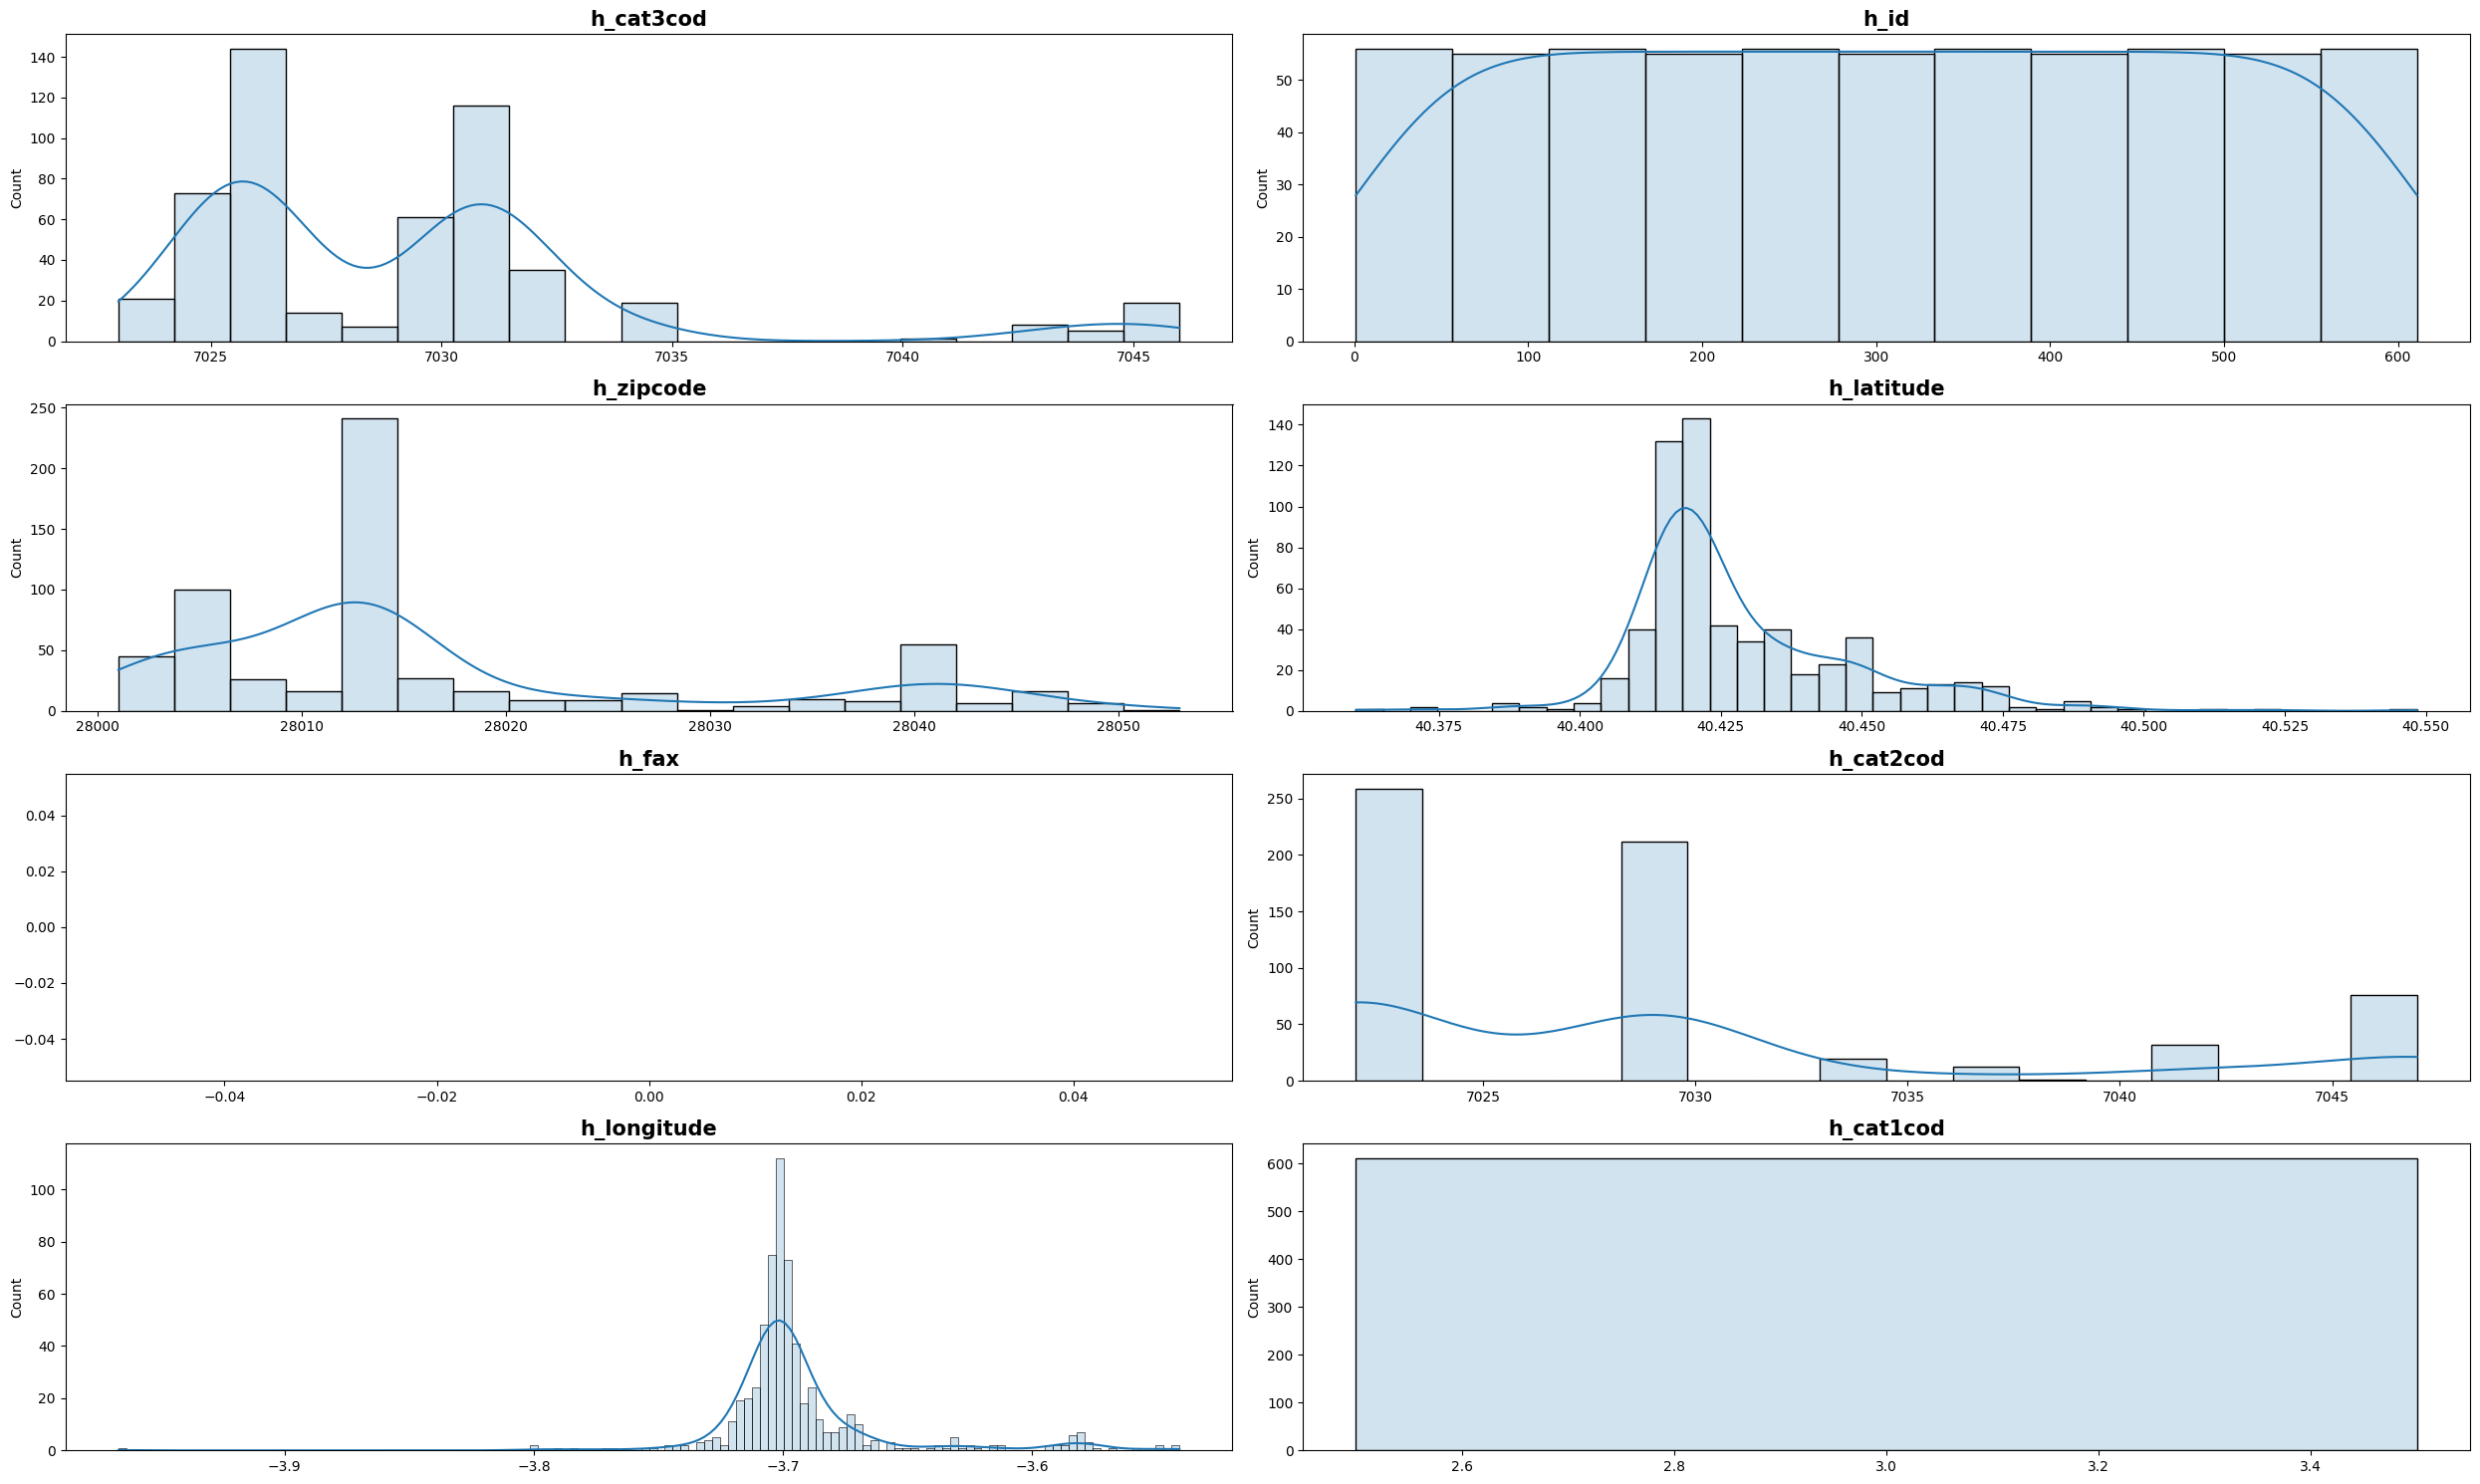

In [23]:
sc.distribucion_numericas(df[cols_hoteles])

numeric variables distribution -> outliers


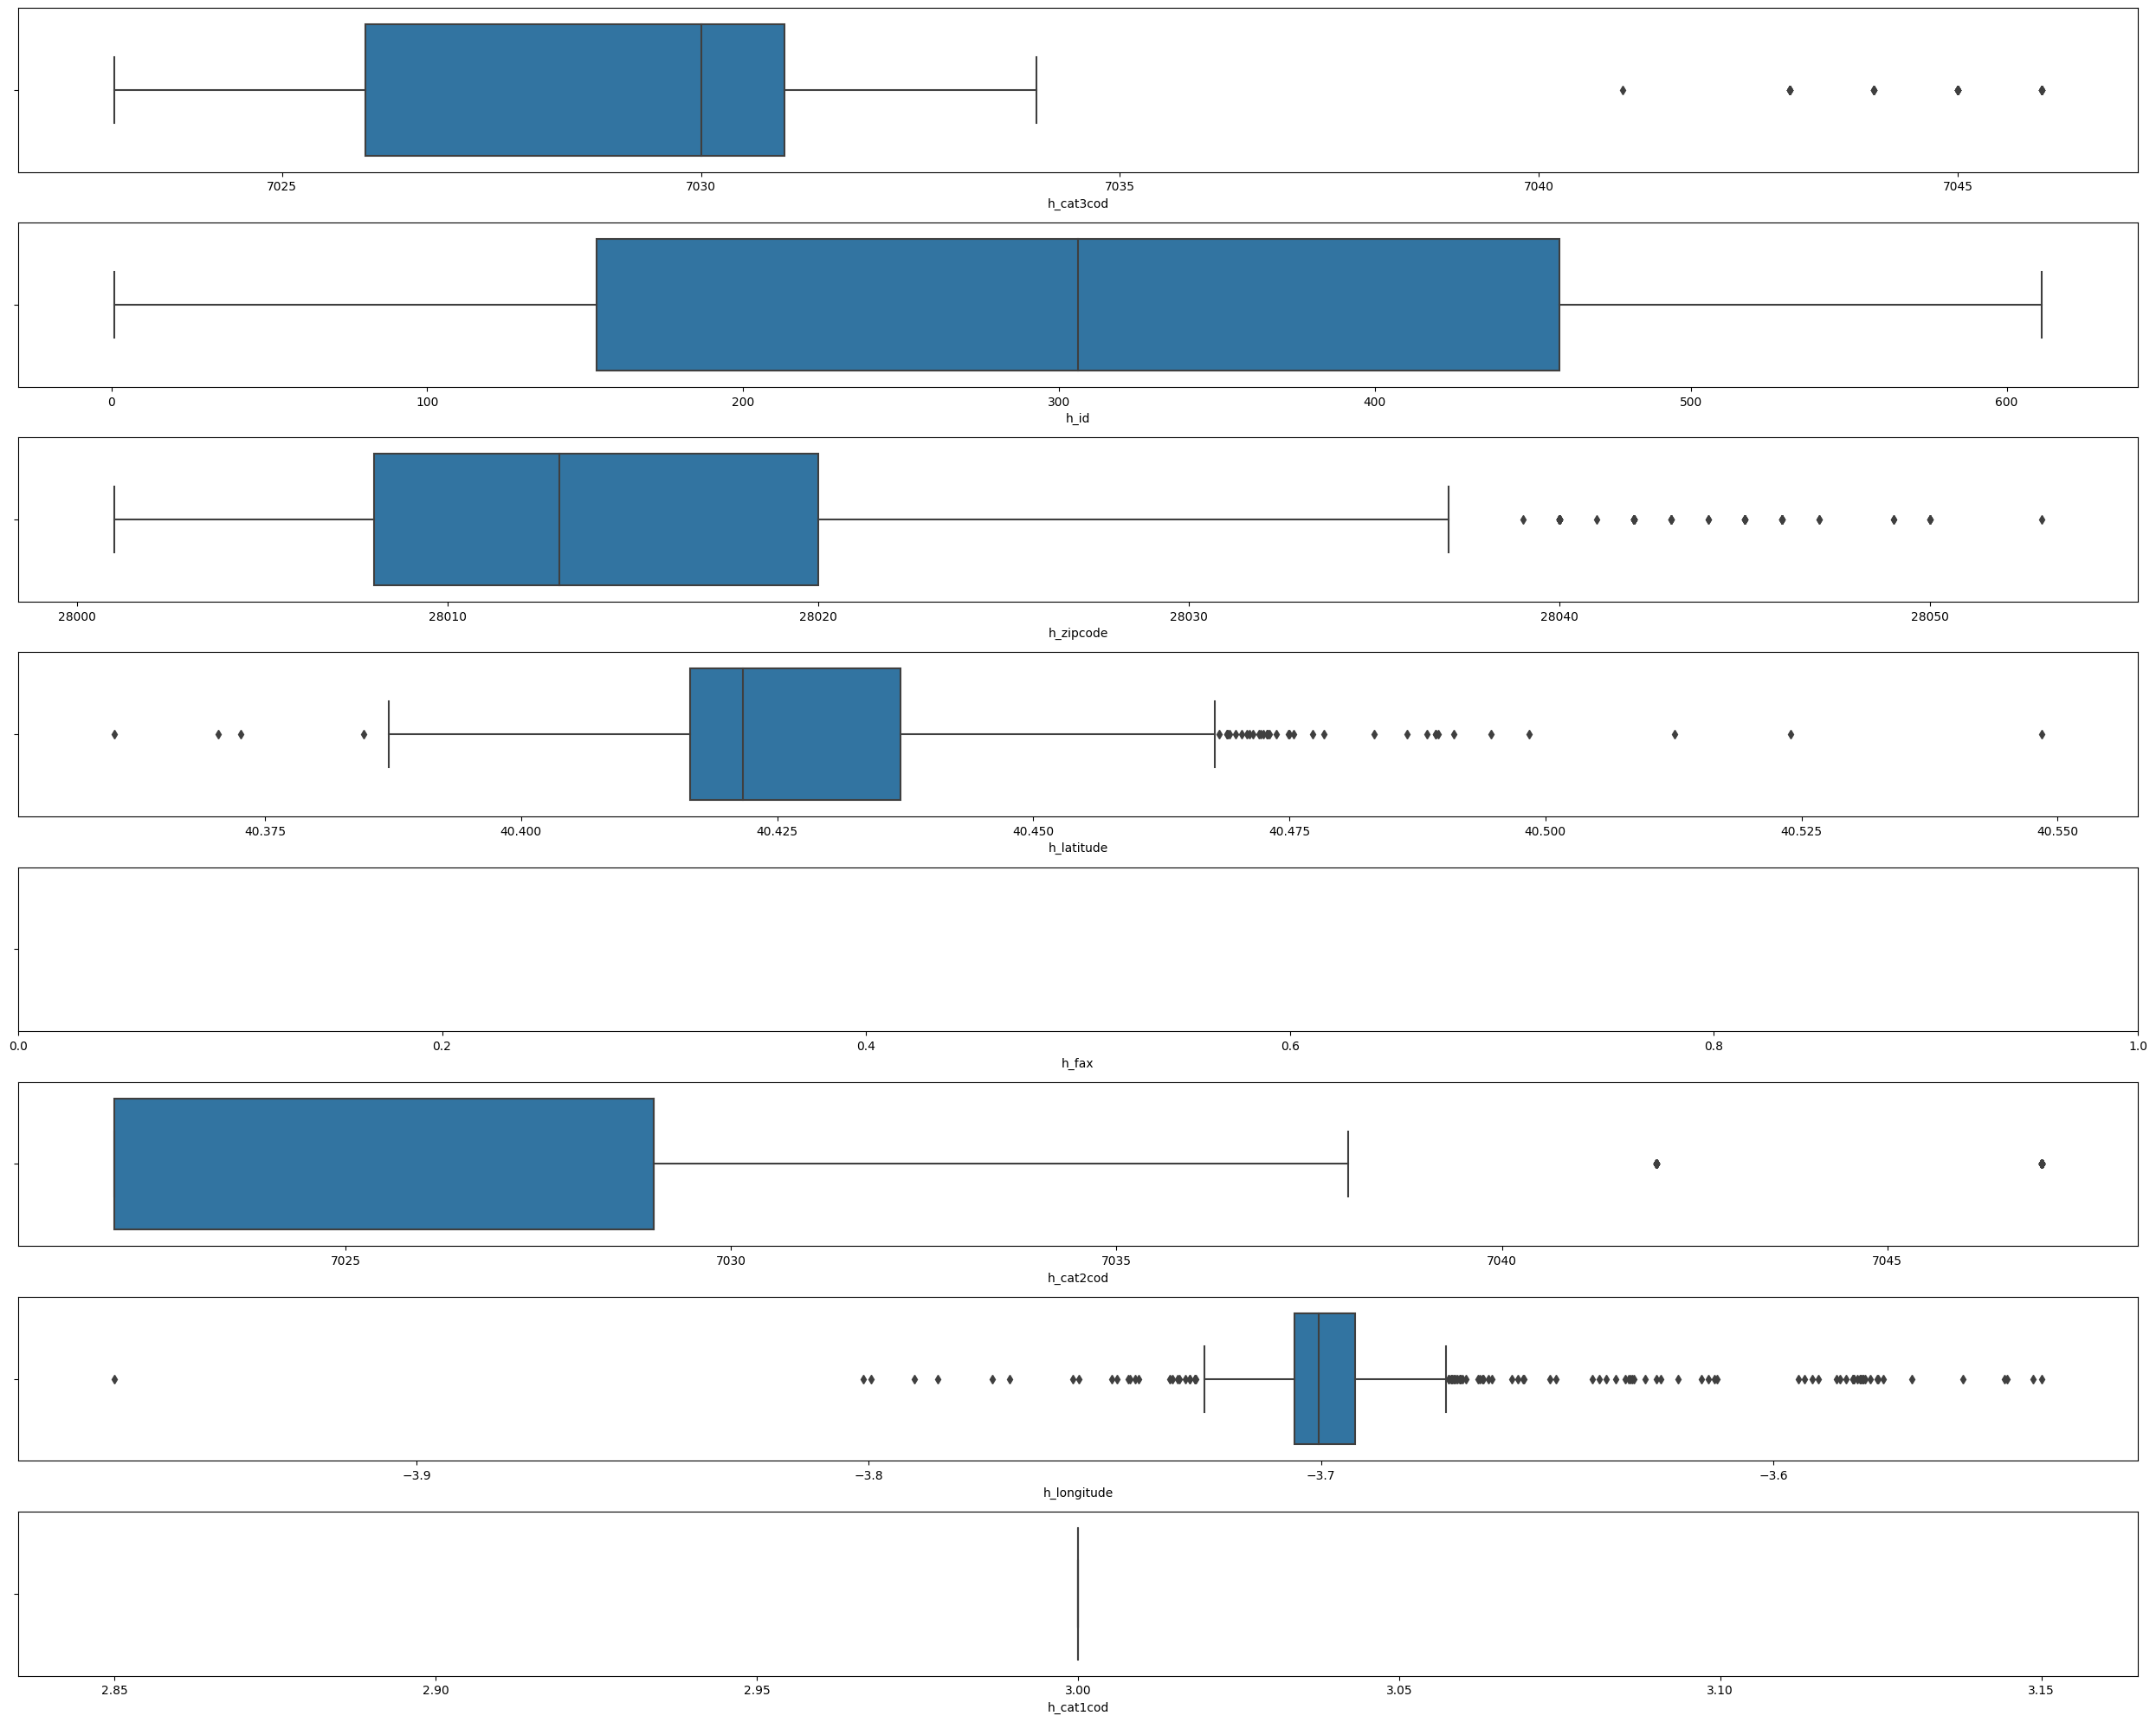

In [24]:
sc.chart_boxplot(df[cols_hoteles])

In [25]:
sc.analisis_basico(df[cols_hoteles])

_________________________________

1_Data Structure: (12310, 22)


,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   h_cat3cod                523 non-null    float64
 1   h_id                     611 non-null    float64
 2   h_web                    611 non-null    object 
 3   h_title                  611 non-null    object 
 4   h_zipcode                611 non-null    float64
 5   h_latitude               611 non-null    float64
 6   h_email                  563 non-null    object 
 7   h_body                   510 non-null    object 
 8   h_fax                    0 non-null      float64
 9   h_phone                  611 non-null    object 
 10  h_cat3txt                523 non-null    object 
 11  h_subadministrativearea  611 non-null    object 
 12  h_address                611 non-null    object 
 13  h_cat1txt                611 non-null    object 
 14  h_cat2txt             

None

_________________________________

2_Duplicated columns:
11698
_________________________________

3_Null values distribution:


,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod
nulos,11787,11699,11699,11699,11699,11699,11747,11800,12310,11699,11787,11699,11699,11699,11699,11699,11699,11699,11699,12306,11699,11699
dtypes,float64,float64,object,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,float64,float64


_________________________________

4_Numerical variables distribution:


,h_cat3cod,h_id,h_zipcode,h_latitude,h_fax,h_cat2cod,h_longitude,h_cat1cod
count,523.000000,611.000000,611.000000,611.000000,0.0,611.000000,611.000000,611.0
mean,7029.263862,306.000000,28016.312602,40.428868,NaN,7029.248773,-3.693574,3.0
std,4.848981,176.524786,12.750268,0.020209,NaN,8.477375,0.034851,0.0
min,7023.000000,1.000000,28001.000000,40.360298,NaN,7022.000000,-3.966751,3.0
25%,7026.000000,153.500000,28008.000000,40.416475,NaN,7022.000000,-3.705961,3.0
50%,7030.000000,306.000000,28013.000000,40.421616,NaN,7029.000000,-3.700432,3.0
75%,7031.000000,458.500000,28020.000000,40.437059,NaN,7029.000000,-3.692397,3.0
max,7046.000000,611.000000,28053.000000,40.548430,NaN,7047.000000,-3.540730,3.0


_________________________________

5_Categorical variables distribution:


,h_web,h_title,h_email,h_body,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_country,h_locality
count,611,611,563,510,611,523,611,611,611,611,611,611,611,4
unique,611,611,556,510,607,11,1,606,1,7,611,1,1,1
top,http://www.esmadrid.com/alojamientos/miau_6,Miau,reservas@hostalivor.com,"<p><strong>Su situación, en la plaza de Santa ...",(+34) 91 429 47 01,4 estrellas,Madrid,"Juan XXIII, 3",Alojamientos,Hoteles,Miau,es,Spain,Madrid
freq,1,1,2,1,2,144,611,2,611,259,1,611,611,4


the variables that come form the Spanish Cadaster are:
- `cad_tot_houses` -> total number of houses per parcel
<br>the values go from 0 to 1750, being the median value around 250. that there are nulls in the `cad_tot_houses` column could mean that the building is not residential.
- `cad_tot_hab` -> total inhabitants
<br>the inhabitants per building? not sure if this data is cadastral. It can be the inhabitants of the area the buiding is located.
- `cad_tot_hotels` -> total number of hotels (buildigs that are classified as hotels by the cadaster)
<br>number of hotels in the area. The avg is zero, depending on the area of the city you're evaluating.
- `cad_med_consq` -> median value of the construction quality of the cadastral horizontal division
<br>is a 1-10 scale, so it is the median rating that the buildings have in the area, based on the construction techniques. The median value is a bit bigger than 4.
- `cad_tot_parcs` -> land surface
<br>is the plot that the buildings are build upon. The normal value is less than 50sqm? 
- `cad_pk` ->
- `cad_tot_srf_houses` -> houses' surface
<br>the built surface of the house classification. The median value is less than 25000 sqm.
- `cad_tot_srf_hotels` -> hotels' surface. 
<br> the built surface of hotels. The median value is around 0, as we've seen the hotel count is small.

# variables locales200

In [26]:
cols_local200 = scl.columnList(df, 'local200_')

the columns that have local200_ on their name are: ['local200_n_shops24h', 'local200_n_shops', 'local200_n_prox_fresco', 'local200_n_prox_supers', 'local200_n_epigrafes', 'local200_n_alquillercoche', 'local200_n_prox_alcohol', 'local200_n_fiesta', 'local200_n_prox_noalim', 'local200_n_alojamiento', 'local200_n_prox_educacion', 'local200_n_vacios', 'local200_n_locutoris', 'local200_n_restaurants', 'local200_n_desconocidos', 'local200_n_prox_pastelerias', 'local200_n_prox_supersbig', 'local200_n_agrupaciones', 'local200_n_locales', 'local200_n_sex']


numeric variables distribution


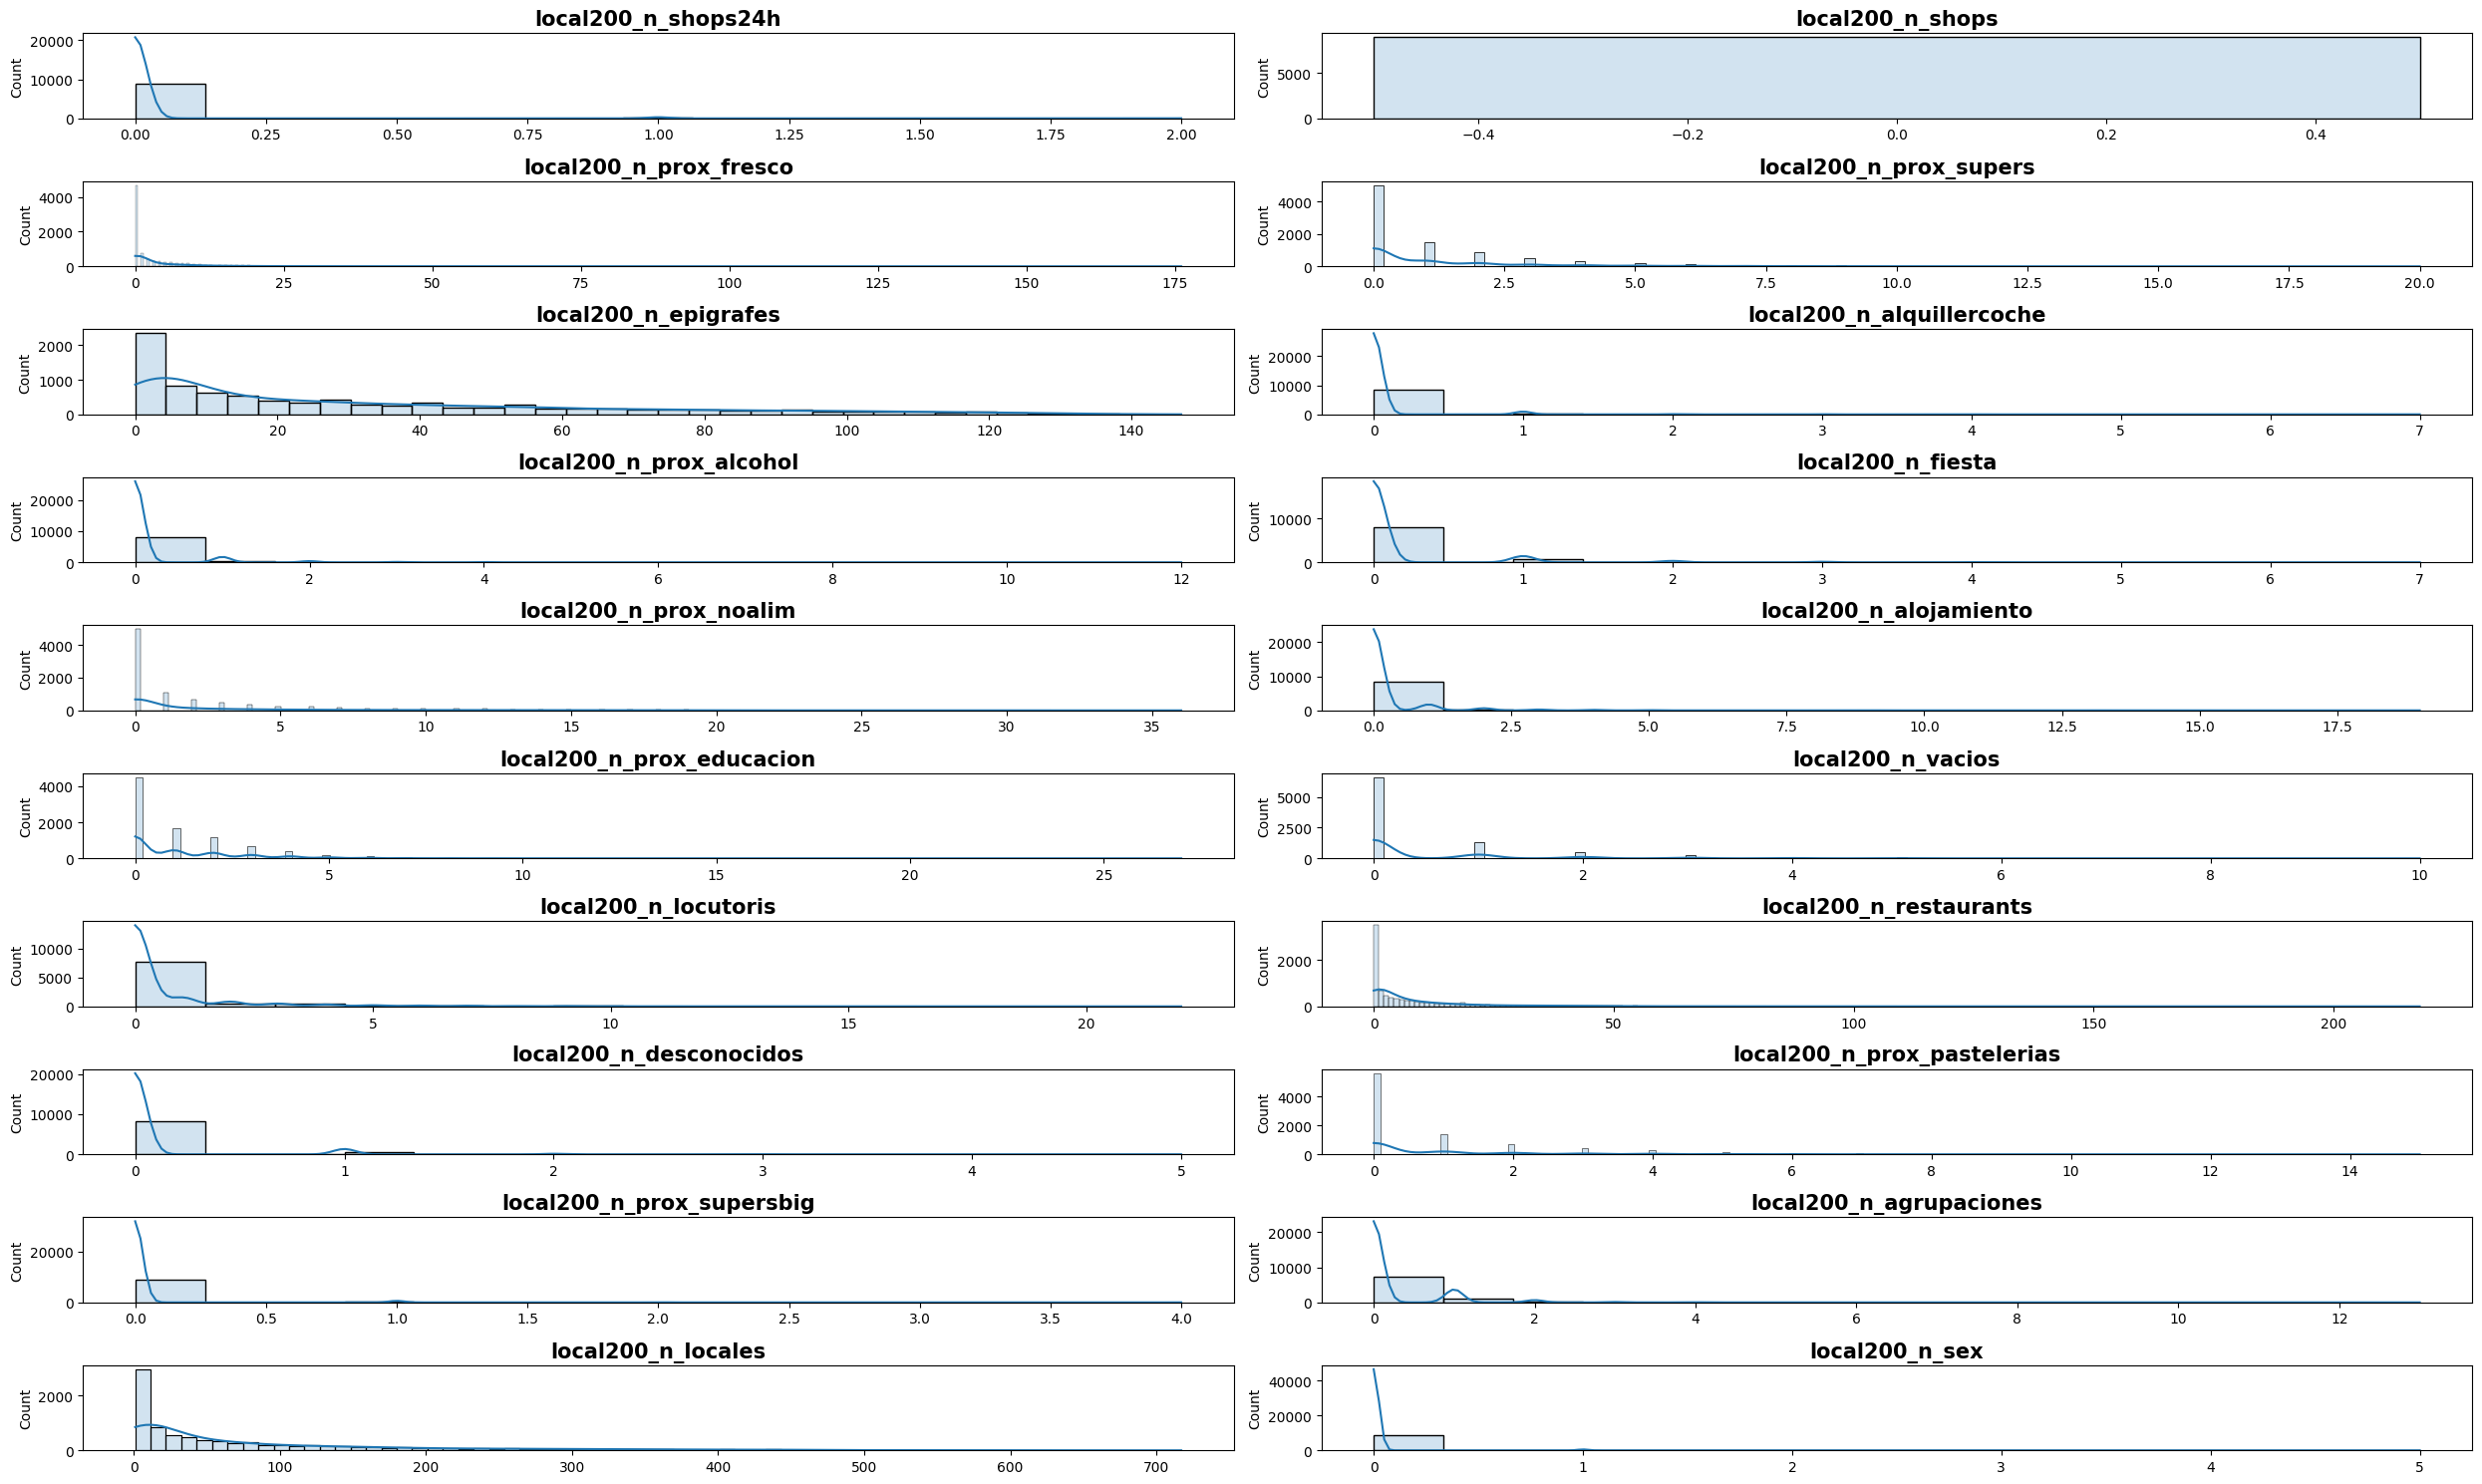

In [27]:
sc.distribucion_numericas(df[cols_local200])

numeric variables distribution -> outliers


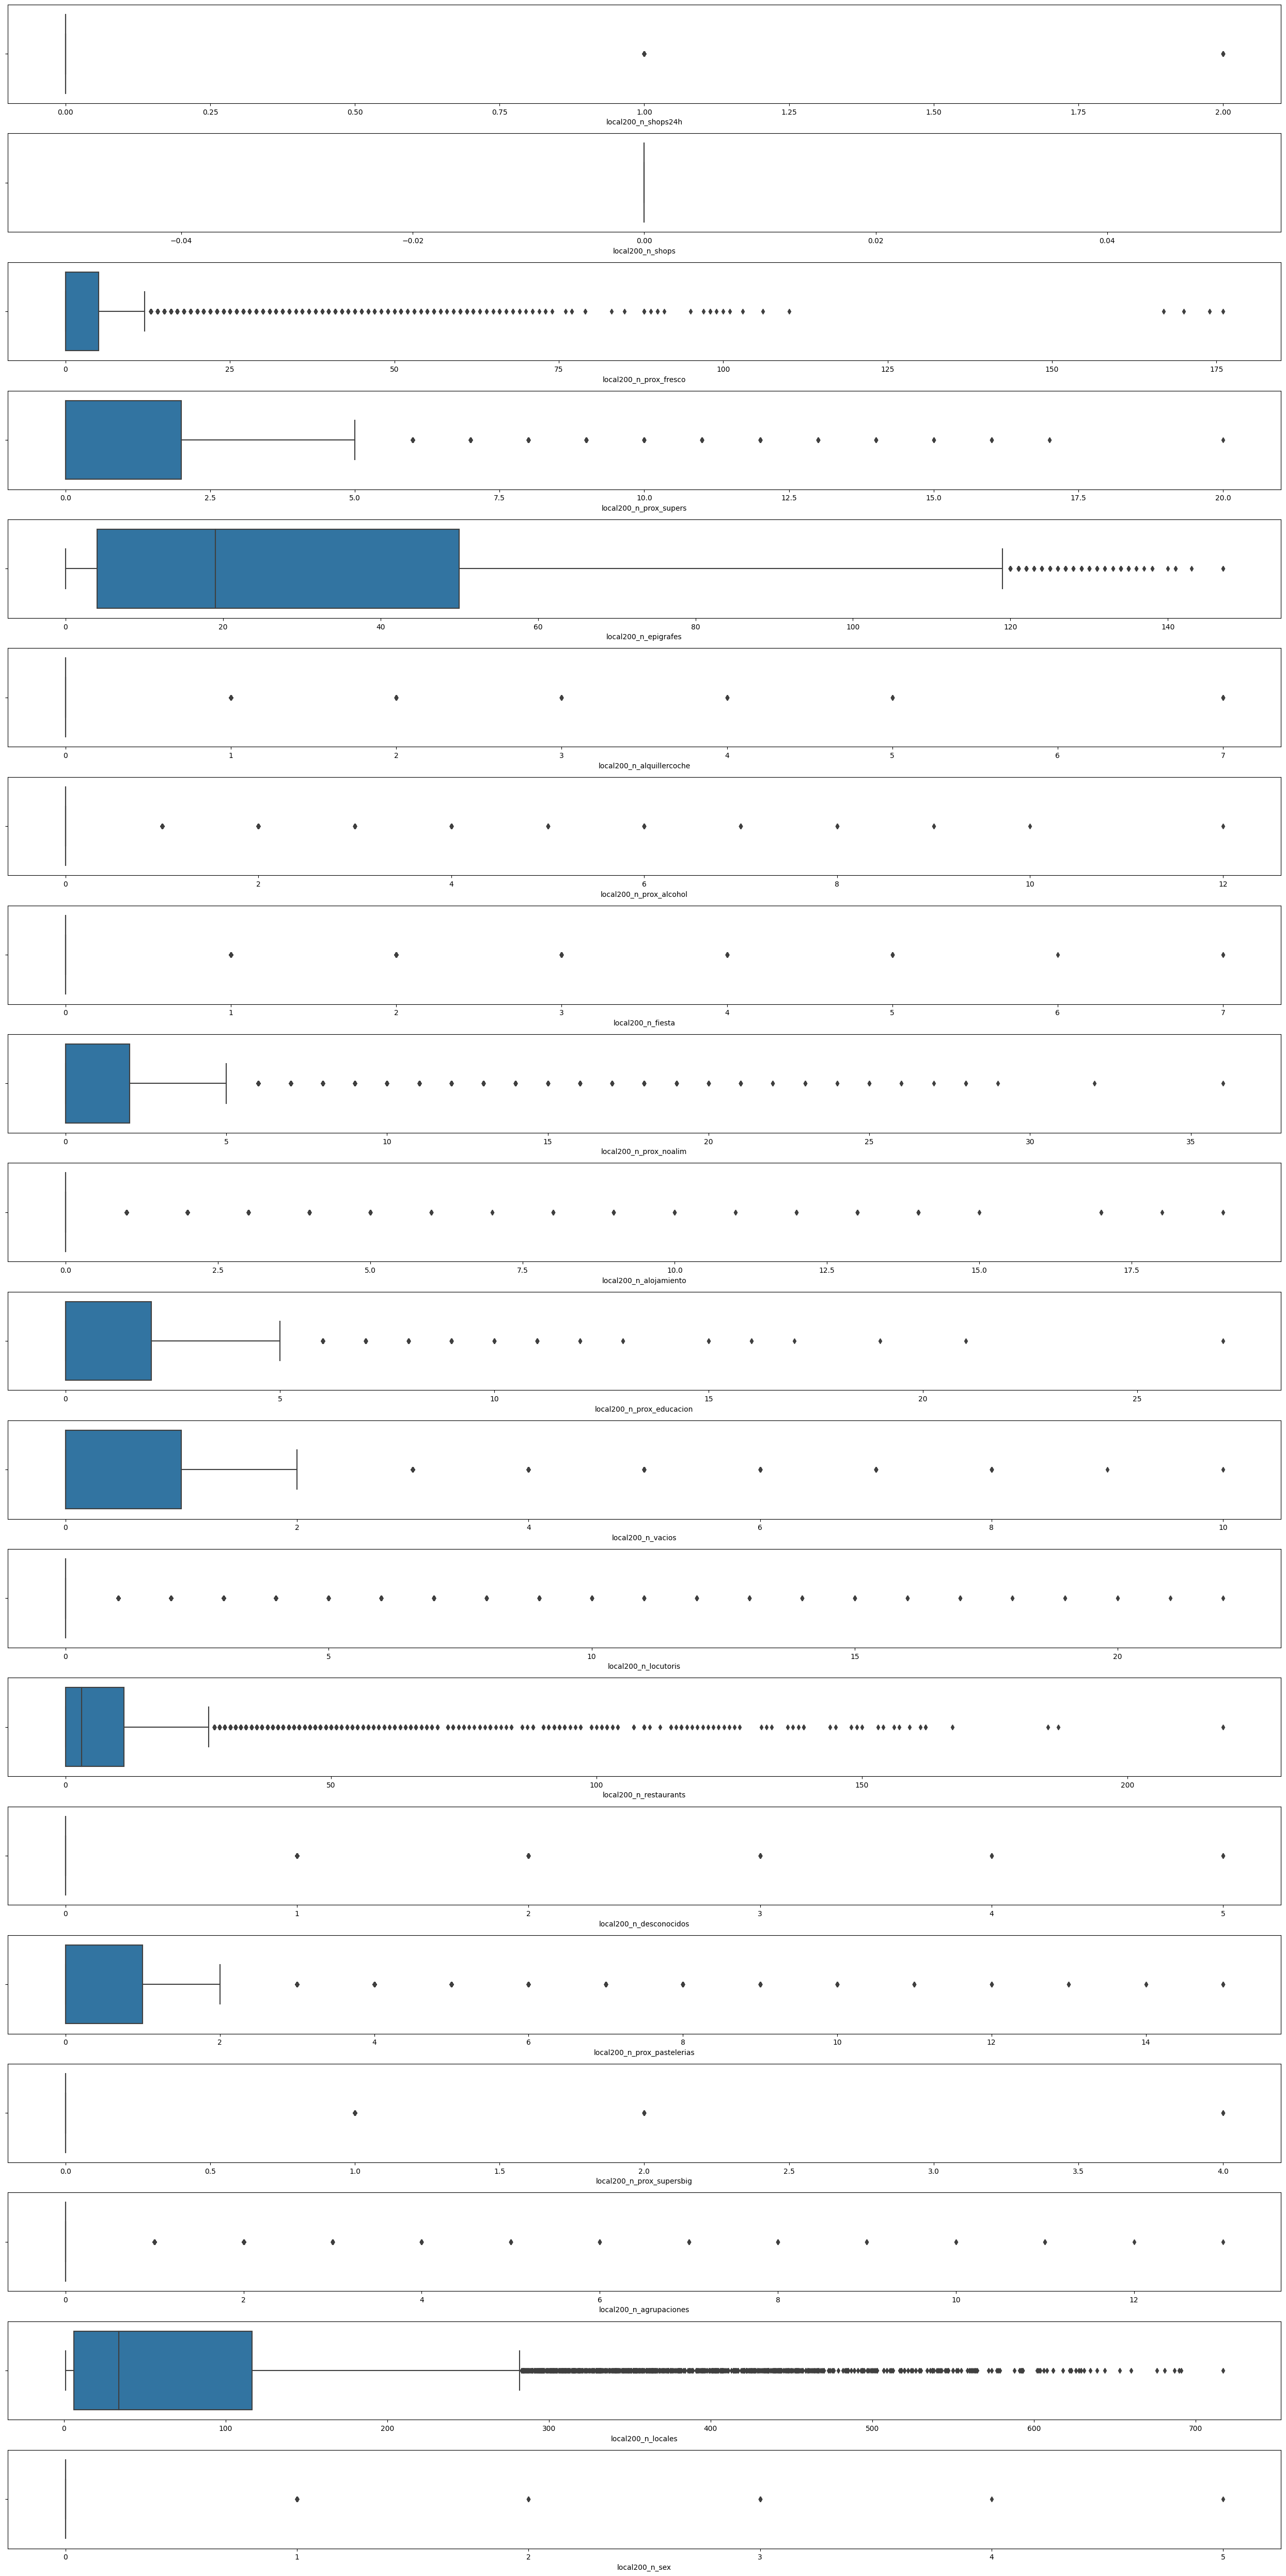

In [29]:
sc.chart_boxplot(df[cols_local200])

In [30]:
sc.analisis_basico(df[cols_local200])

_________________________________

1_Data Structure: (12310, 20)


,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex
0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0
1,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   local200_n_shops24h          8919 non-null   float64
 1   local200_n_shops             8919 non-null   float64
 2   local200_n_prox_fresco       8919 non-null   float64
 3   local200_n_prox_supers       8919 non-null   float64
 4   local200_n_epigrafes         8919 non-null   float64
 5   local200_n_alquillercoche    8919 non-null   float64
 6   local200_n_prox_alcohol      8919 non-null   float64
 7   local200_n_fiesta            8919 non-null   float64
 8   local200_n_prox_noalim       8919 non-null   float64
 9   local200_n_alojamiento       8919 non-null   float64
 10  local200_n_prox_educacion    8919 non-null   float64
 11  local200_n_vacios            8919 non-null   float64
 12  local200_n_locutoris         8919 non-null   float64
 13  local200_n_resta

None

_________________________________

2_Duplicated columns:
5715
_________________________________

3_Null values distribution:


,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex
nulos,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex
count,8919.000000,8919.0,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000
mean,0.016818,0.0,4.952797,1.226483,31.213925,0.056621,0.145308,0.139814,2.024779,0.237471,1.200807,0.475277,0.645027,9.532571,0.084202,0.912995,0.023882,0.227604,84.604776,0.015697
std,0.138666,0.0,11.199045,2.136582,32.870521,0.352864,0.615061,0.502366,3.691658,1.039964,1.761686,1.039816,1.803977,16.954718,0.336826,1.683811,0.179679,0.685607,115.772824,0.154836
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
75%,0.000000,0.0,5.000000,2.000000,50.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000,116.500000,0.000000
max,2.000000,0.0,176.000000,20.000000,147.000000,7.000000,12.000000,7.000000,36.000000,19.000000,27.000000,10.000000,22.000000,218.000000,5.000000,15.000000,4.000000,13.000000,717.000000,5.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


this variables come from the census of business premises of the Ayuntamiento de Madrid. This counts for the businesses that are 200 m from the grid center:
- `'local200_n_shops24h'` -> number of shops that open 24h (more like the 7-11 shops)
- `'local200_n_shops'` -> number of regular shops
- `'local200_n_prox_fresco'` -> number of shops that sell fresh produce, such as fruit shops or fishmonger.
- `'local200_n_prox_supers'` -> number of supermarkets
- `'local200_n_epigrafes'` -> 
- `'local200_n_alquillercoche'` -> number of car rentals
- `'local200_n_prox_alcohol'` -> numer of licquor shops
- `'local200_n_fiesta'` ->
- `'local200_n_prox_noalim'` -> number of stores that don't sell food
- `'local200_n_alojamiento'` -> number of accomodations
- `'local200_n_prox_educacion'` -> number of nearby  schools
- `'local200_n_vacios'` -> number of empty premises
- `'local200_n_locutoris'` -> number of callshops
- `'local200_n_restaurants'` -> number of restaurants
- `'local200_n_desconocidos'` -> number of unkonw or not classified locations
- `'local200_n_prox_pastelerias'` -> number of bakeries
- `'local200_n_prox_supersbig'` -> numberr of hypermarkets / superstores
- `'local200_n_agrupaciones'` -> total number of multi purpose premises
- `'local200_n_locales'` -> total number of premises on one area
- `'local200_n_sex'` -> total number of sexshops

# variables locales300

In [31]:
cols_local300 = scl.columnList(df, 'local300_')

the columns that have local300_ on their name are: ['local300_n_shops24h', 'local300_n_shops', 'local300_n_prox_fresco', 'local300_n_prox_supers', 'local300_n_epigrafes', 'local300_n_alquillercoche', 'local300_n_prox_alcohol', 'local300_n_fiesta', 'local300_n_prox_noalim', 'local300_n_alojamiento', 'local300_n_prox_educacion', 'local300_n_vacios', 'local300_n_locutoris', 'local300_n_restaurants', 'local300_n_desconocidos', 'local300_n_prox_pastelerias', 'local300_n_prox_supersbig', 'local300_n_agrupaciones', 'local300_n_locales', 'local300_n_sex']


numeric variables distribution


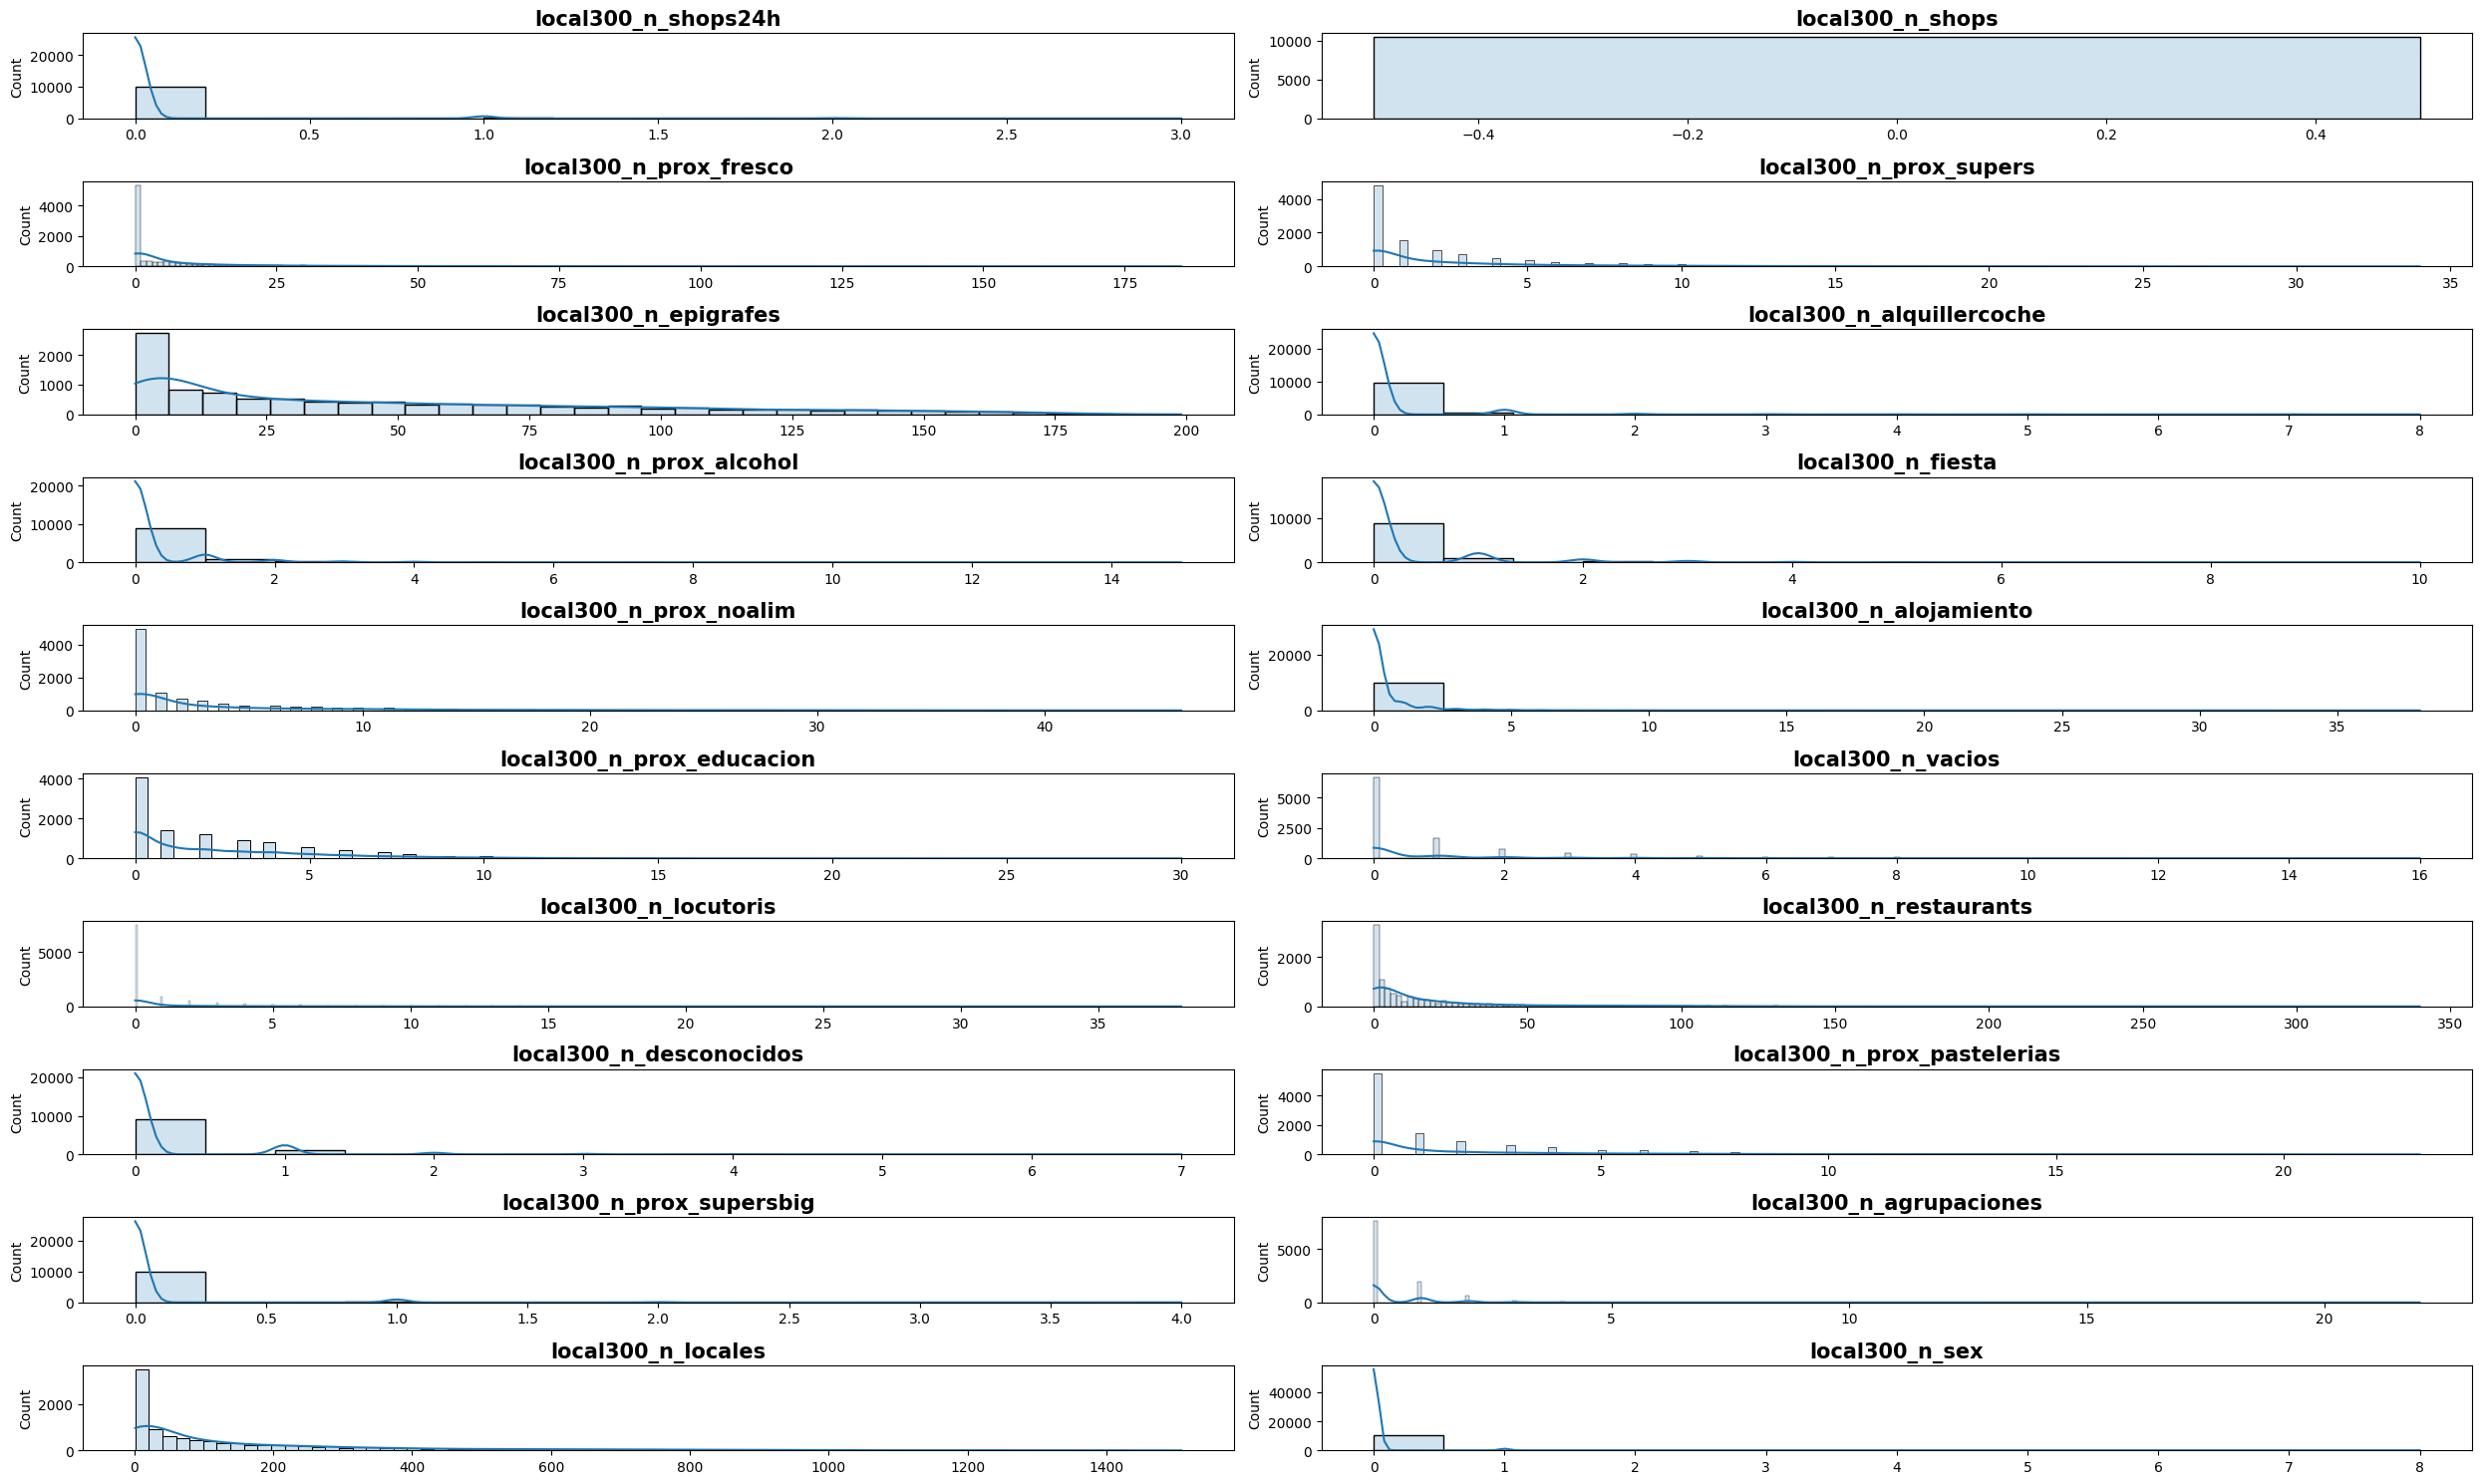

In [32]:
sc.distribucion_numericas(df[cols_local300])

numeric variables distribution -> outliers


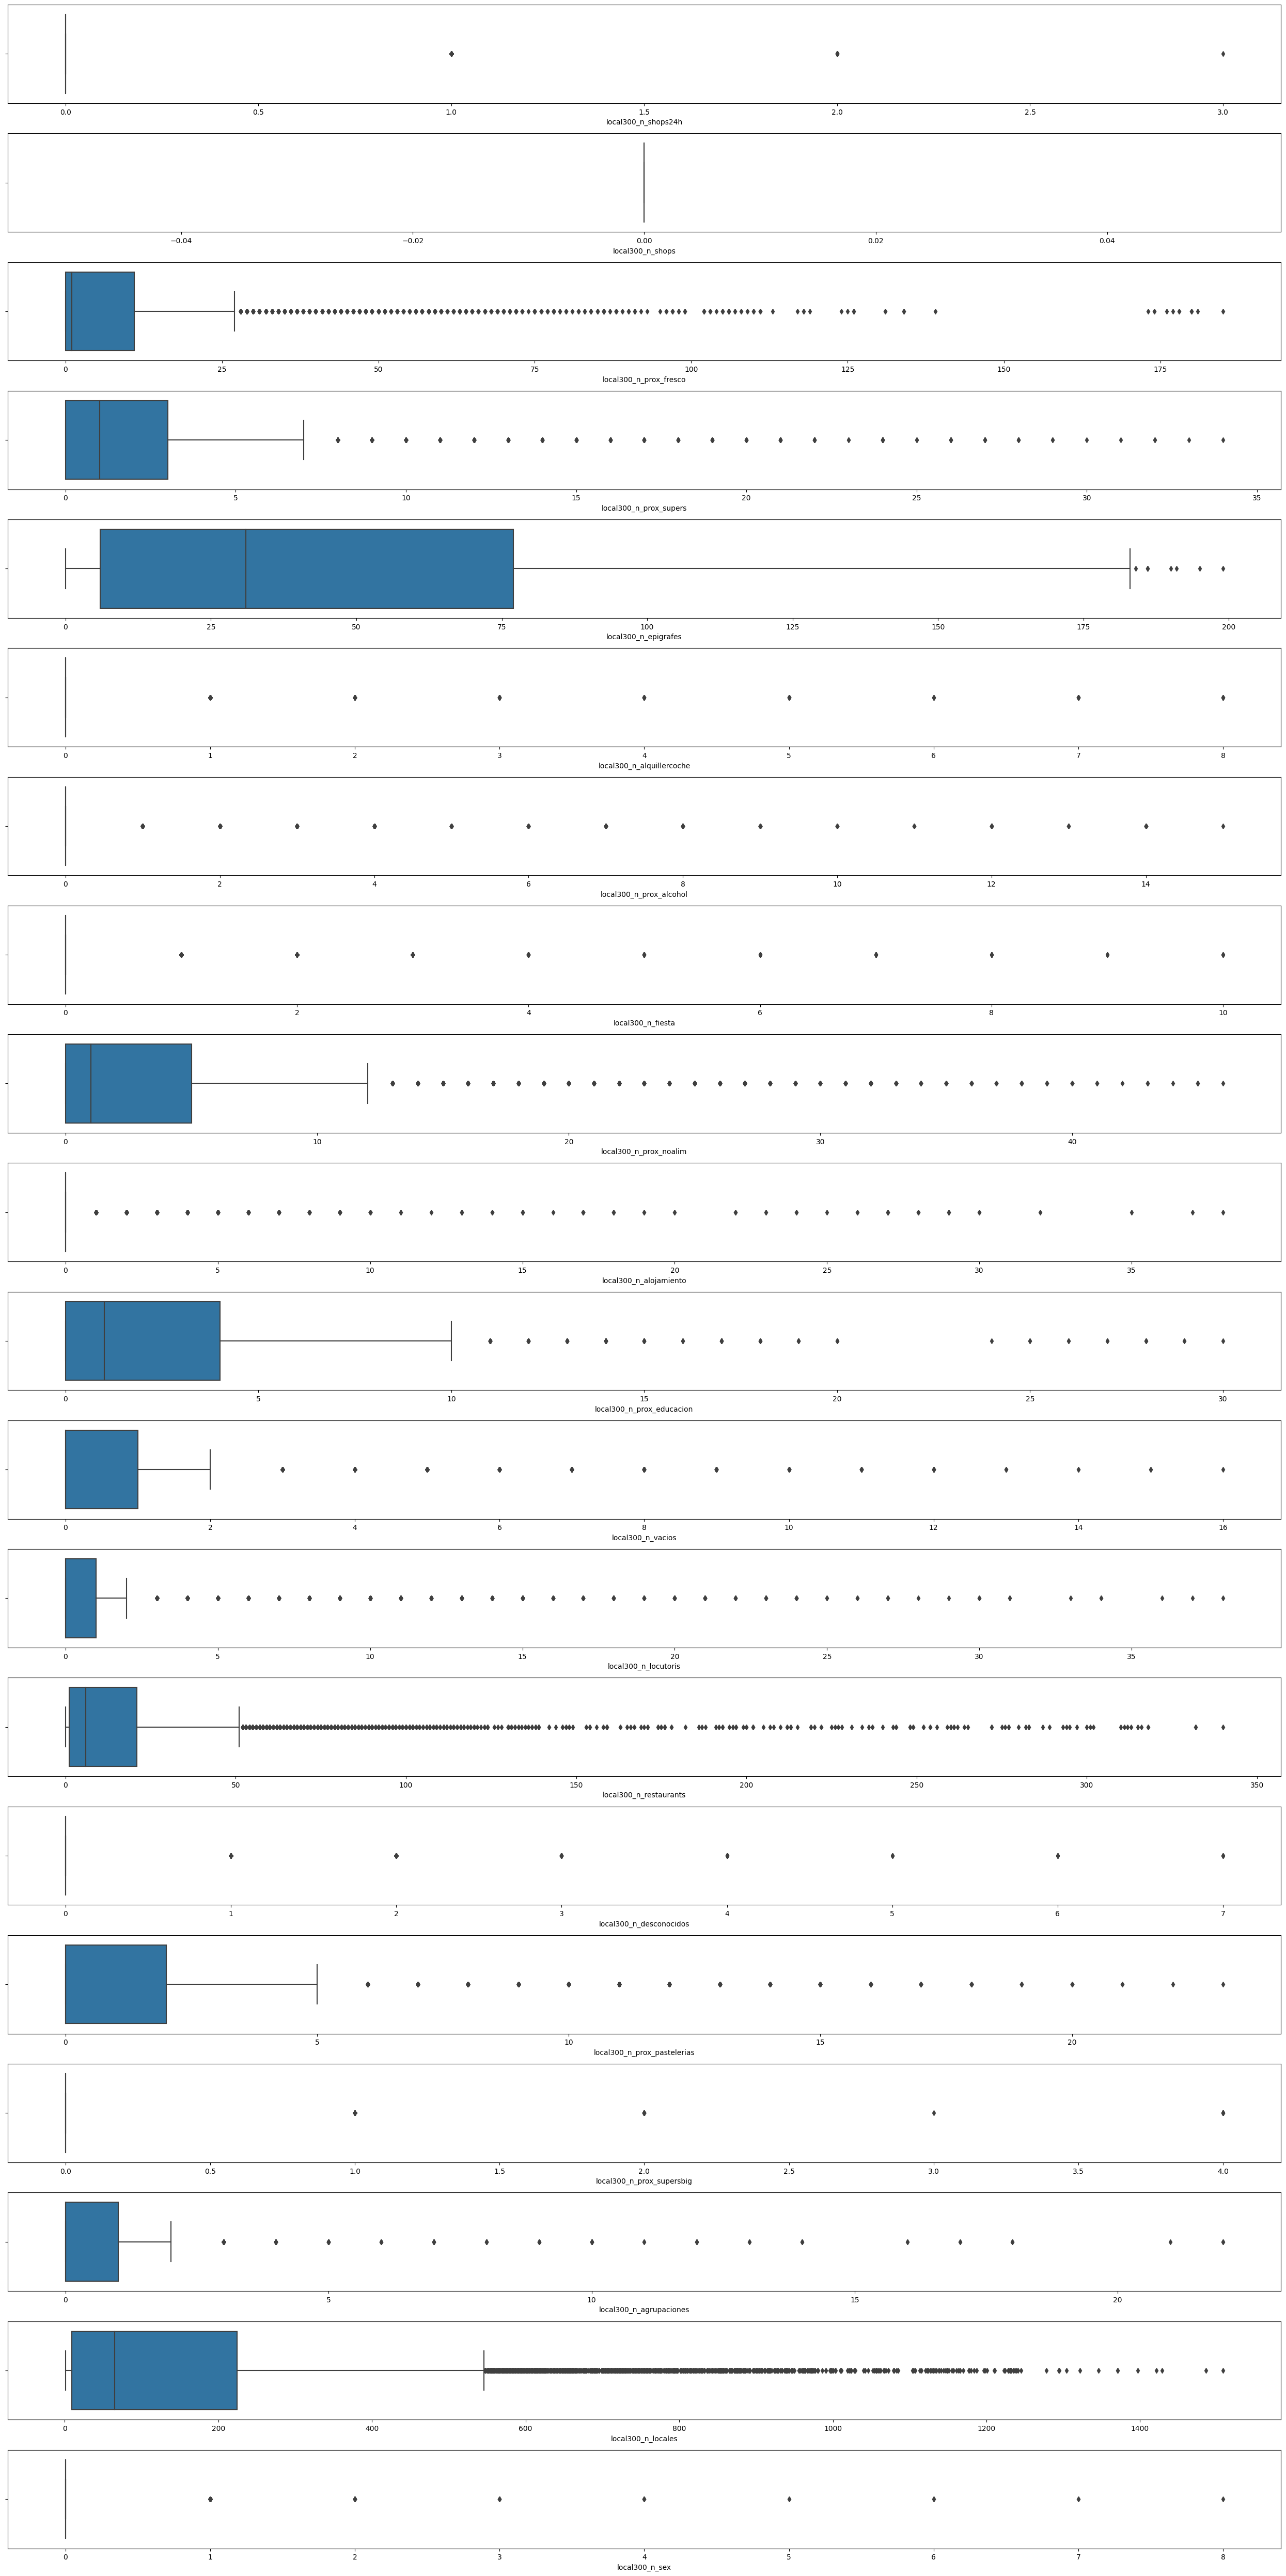

In [33]:
sc.chart_boxplot(df[cols_local300])

In [34]:
sc.analisis_basico(df[cols_local300])

_________________________________

1_Data Structure: (12310, 20)


,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex
0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0
1,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   local300_n_shops24h          10405 non-null  float64
 1   local300_n_shops             10405 non-null  float64
 2   local300_n_prox_fresco       10405 non-null  float64
 3   local300_n_prox_supers       10405 non-null  float64
 4   local300_n_epigrafes         10405 non-null  float64
 5   local300_n_alquillercoche    10405 non-null  float64
 6   local300_n_prox_alcohol      10405 non-null  float64
 7   local300_n_fiesta            10405 non-null  float64
 8   local300_n_prox_noalim       10405 non-null  float64
 9   local300_n_alojamiento       10405 non-null  float64
 10  local300_n_prox_educacion    10405 non-null  float64
 11  local300_n_vacios            10405 non-null  float64
 12  local300_n_locutoris         10405 non-null  float64
 13  local300_n_resta

None

_________________________________

2_Duplicated columns:
4291
_________________________________

3_Null values distribution:


,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex
nulos,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex
count,10405.000000,10405.0,10405.000000,10405.00000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000
mean,0.033349,0.0,9.604613,2.37703,46.774147,0.108313,0.282749,0.269870,3.898126,0.458914,2.314272,0.918981,1.244978,18.394618,0.165690,1.763095,0.047381,0.431043,163.148486,0.029217
std,0.200784,0.0,18.135663,3.93329,46.644952,0.532393,1.080397,0.813678,6.727334,1.918056,2.979107,1.772225,3.216980,33.568043,0.512657,2.949971,0.256713,1.095663,228.987872,0.246685
min,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.0,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
50%,0.000000,0.0,1.000000,1.00000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000
75%,0.000000,0.0,11.000000,3.00000,77.000000,0.000000,0.000000,0.000000,5.000000,0.000000,4.000000,1.000000,1.000000,21.000000,0.000000,2.000000,0.000000,1.000000,224.000000,0.000000
max,3.000000,0.0,185.000000,34.00000,199.000000,8.000000,15.000000,10.000000,46.000000,38.000000,30.000000,16.000000,38.000000,340.000000,7.000000,23.000000,4.000000,22.000000,1508.000000,8.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


this variables come from the census of business premises of the Ayuntamiento de Madrid. This counts for the businesses that are 300 m from the grid center:
- `'local300_n_shops24h'` -> number of shops that open 24h (more like the 7-11 shops)
- `'local300_n_shops'` -> number of regular shops
- `'local300_n_prox_fresco'` -> number of shops that sell fresh produce, such as fruit shops or fishmonger.
- `'local300_n_prox_supers'` -> number of supermarkets
- `'local300_n_epigrafes'` -> 
- `'local300_n_alquillercoche'` -> number of car rentals
- `'local300_n_prox_alcohol'` -> numer of licquor shops
- `'local300_n_fiesta'` ->
- `'local300_n_prox_noalim'` -> number of stores that don't sell food
- `'local300_n_alojamiento'` -> number of accomodations
- `'local300_n_prox_educacion'` -> number of nearby  schools
- `'local300_n_vacios'` -> number of empty premises
- `'local300_n_locutoris'` -> number of callshops
- `'local300_n_restaurants'` -> number of restaurants
- `'local300_n_desconocidos'` -> number of unkonw or not classified locations
- `'local300_n_prox_pastelerias'` -> number of bakeries
- `'local300_n_prox_supersbig'` -> numberr of hypermarkets / superstores
- `'local300_n_agrupaciones'` -> total number of multi purpose premises
- `'local300_n_locales'` -> total number of premises on one area
- `'local300_n_sex'` -> total number of sexshops

# variables tripadvisor

In [35]:
cols_tripadvisor = scl.columnList(df, 'tp_')

the columns that have tp_ on their name are: ['tp_pricerange_tot', 'tp_rating_tot', 'tp_reviews_max', 'tp_reviews_min', 'tp_offers_tot', 'tp_reviews_med', 'tp_rating_avg', 'tp_pricerange_1', 'tp_pricerange_avg', 'tp_pricerange_3', 'tp_pricerange_2', 'tp_pricerange_0', 'tp_pricerange_med', 'tp_rating_min', 'tp_rating_med', 'tp_rating_max', 'tp_pk', 'tp_reviews_tot', 'tp_reviews_avg']


numeric variables distribution


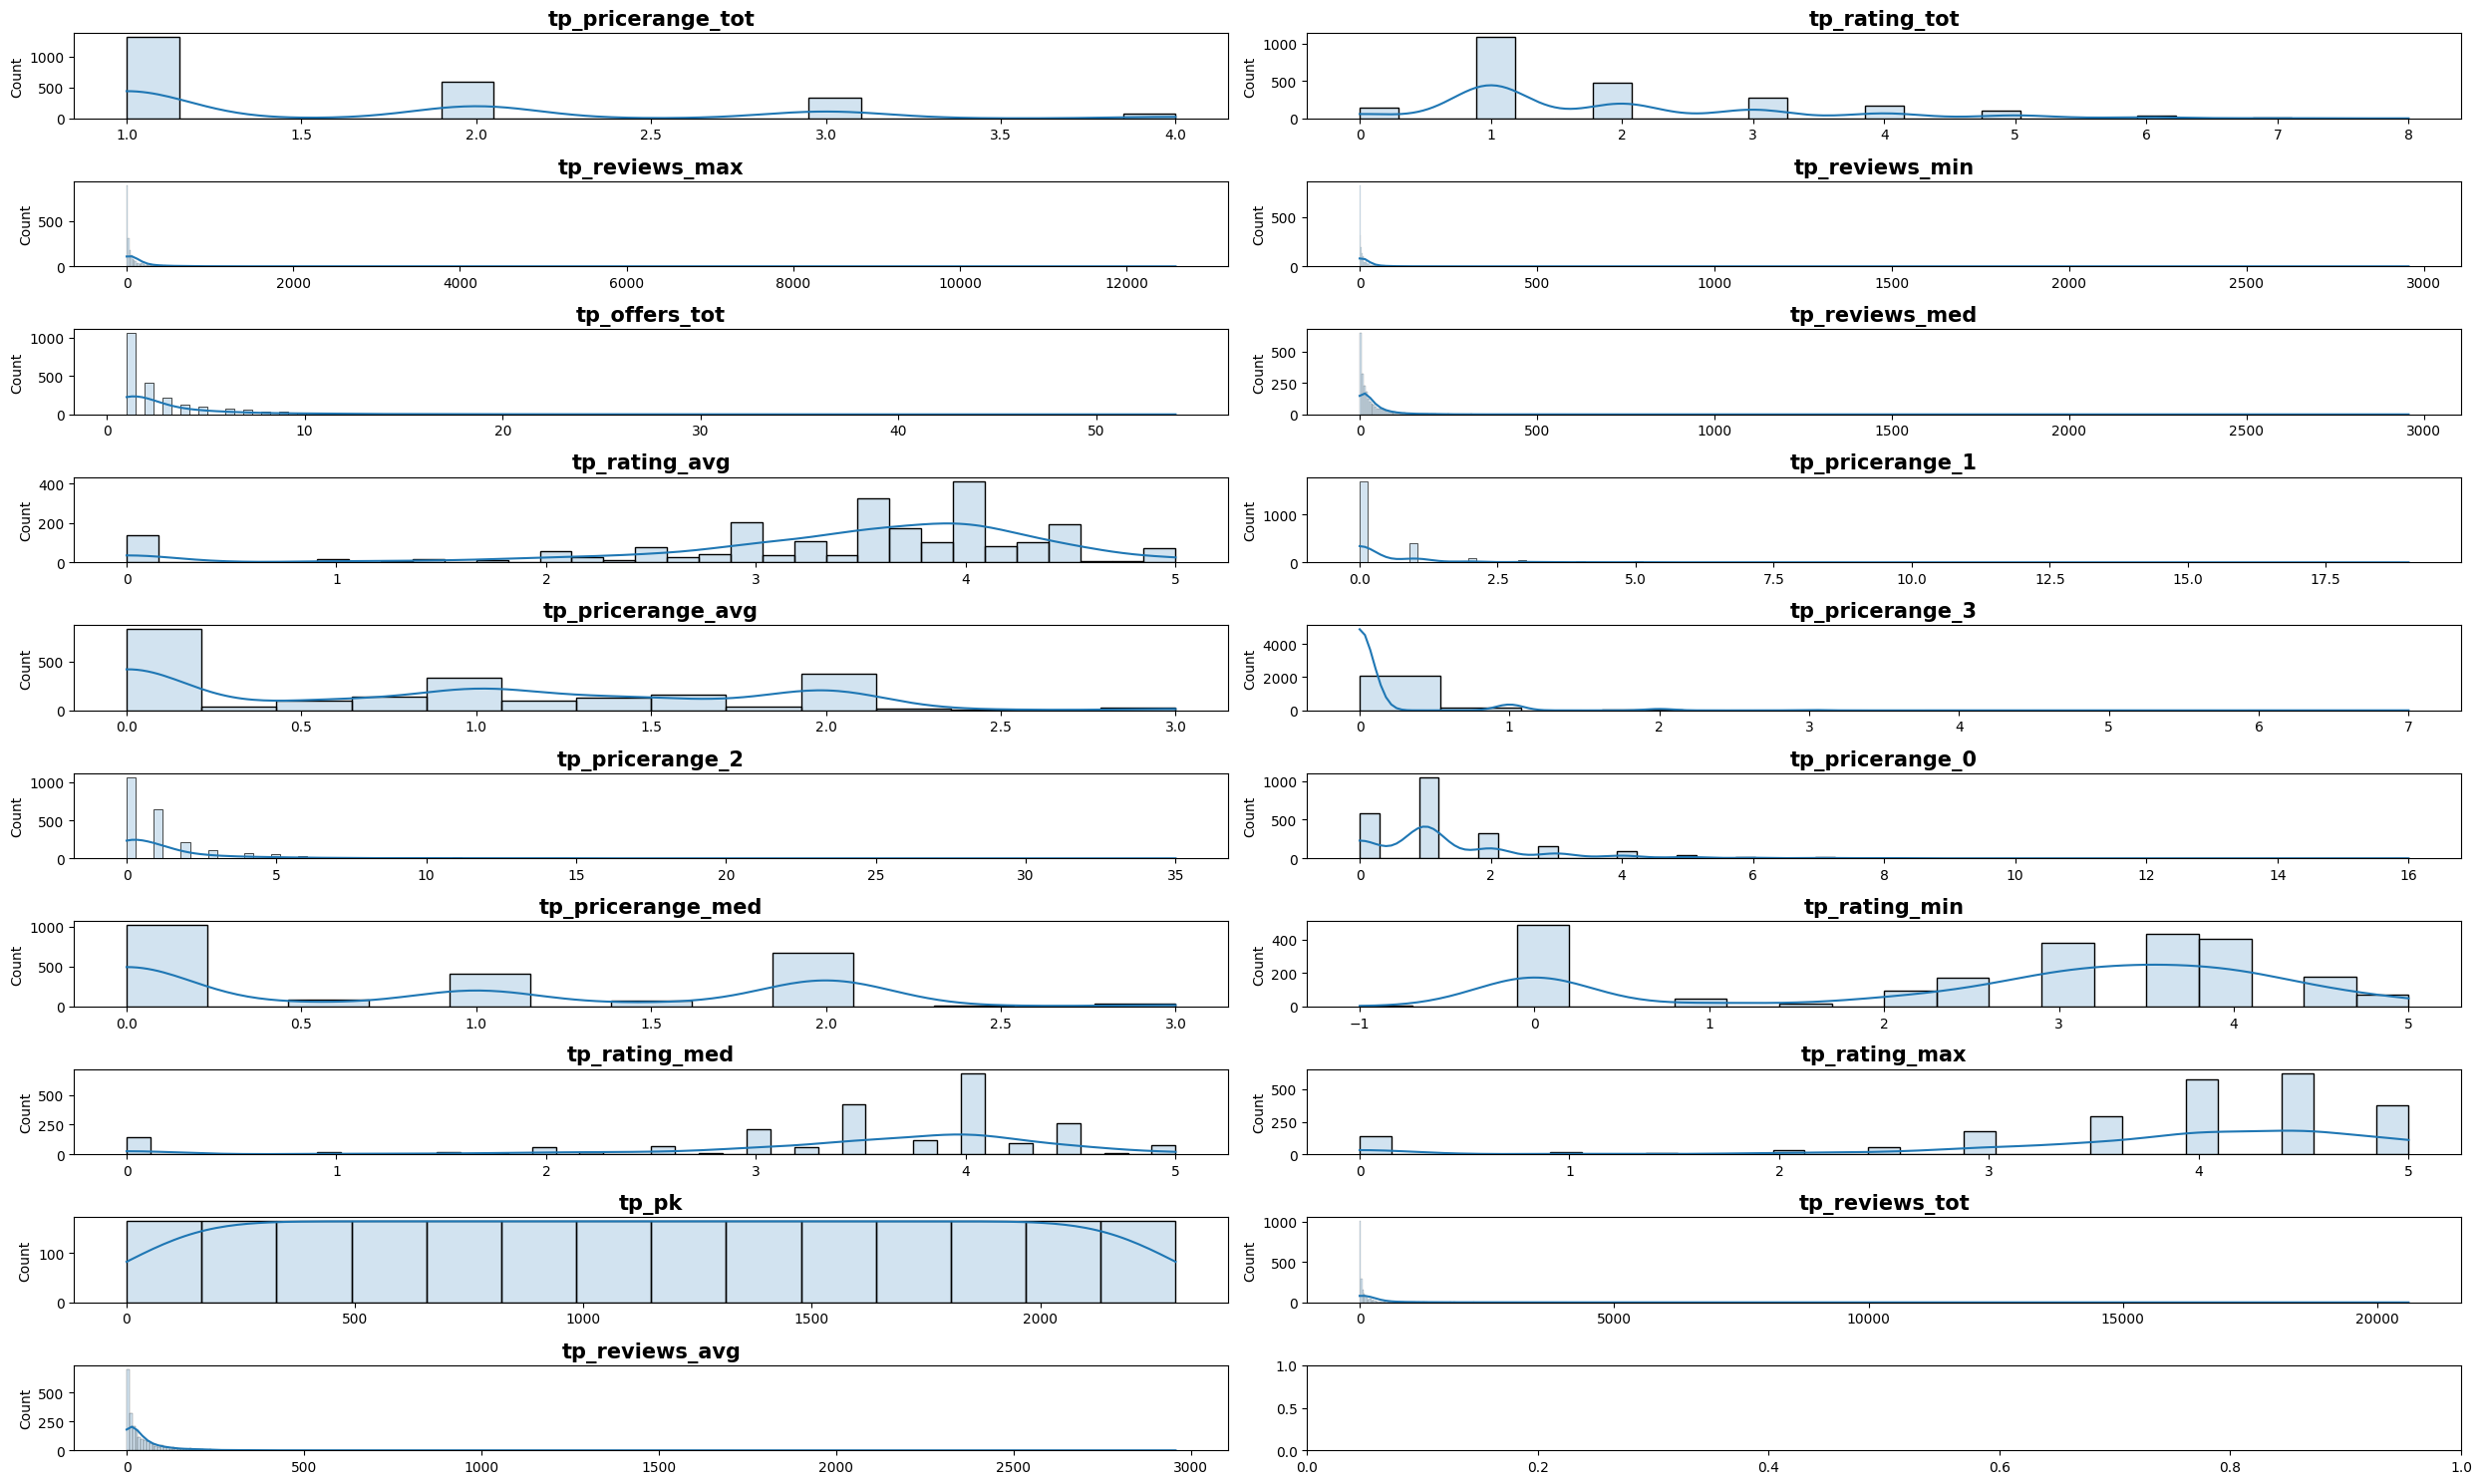

In [36]:
sc.distribucion_numericas(df[cols_tripadvisor])

numeric variables distribution -> outliers


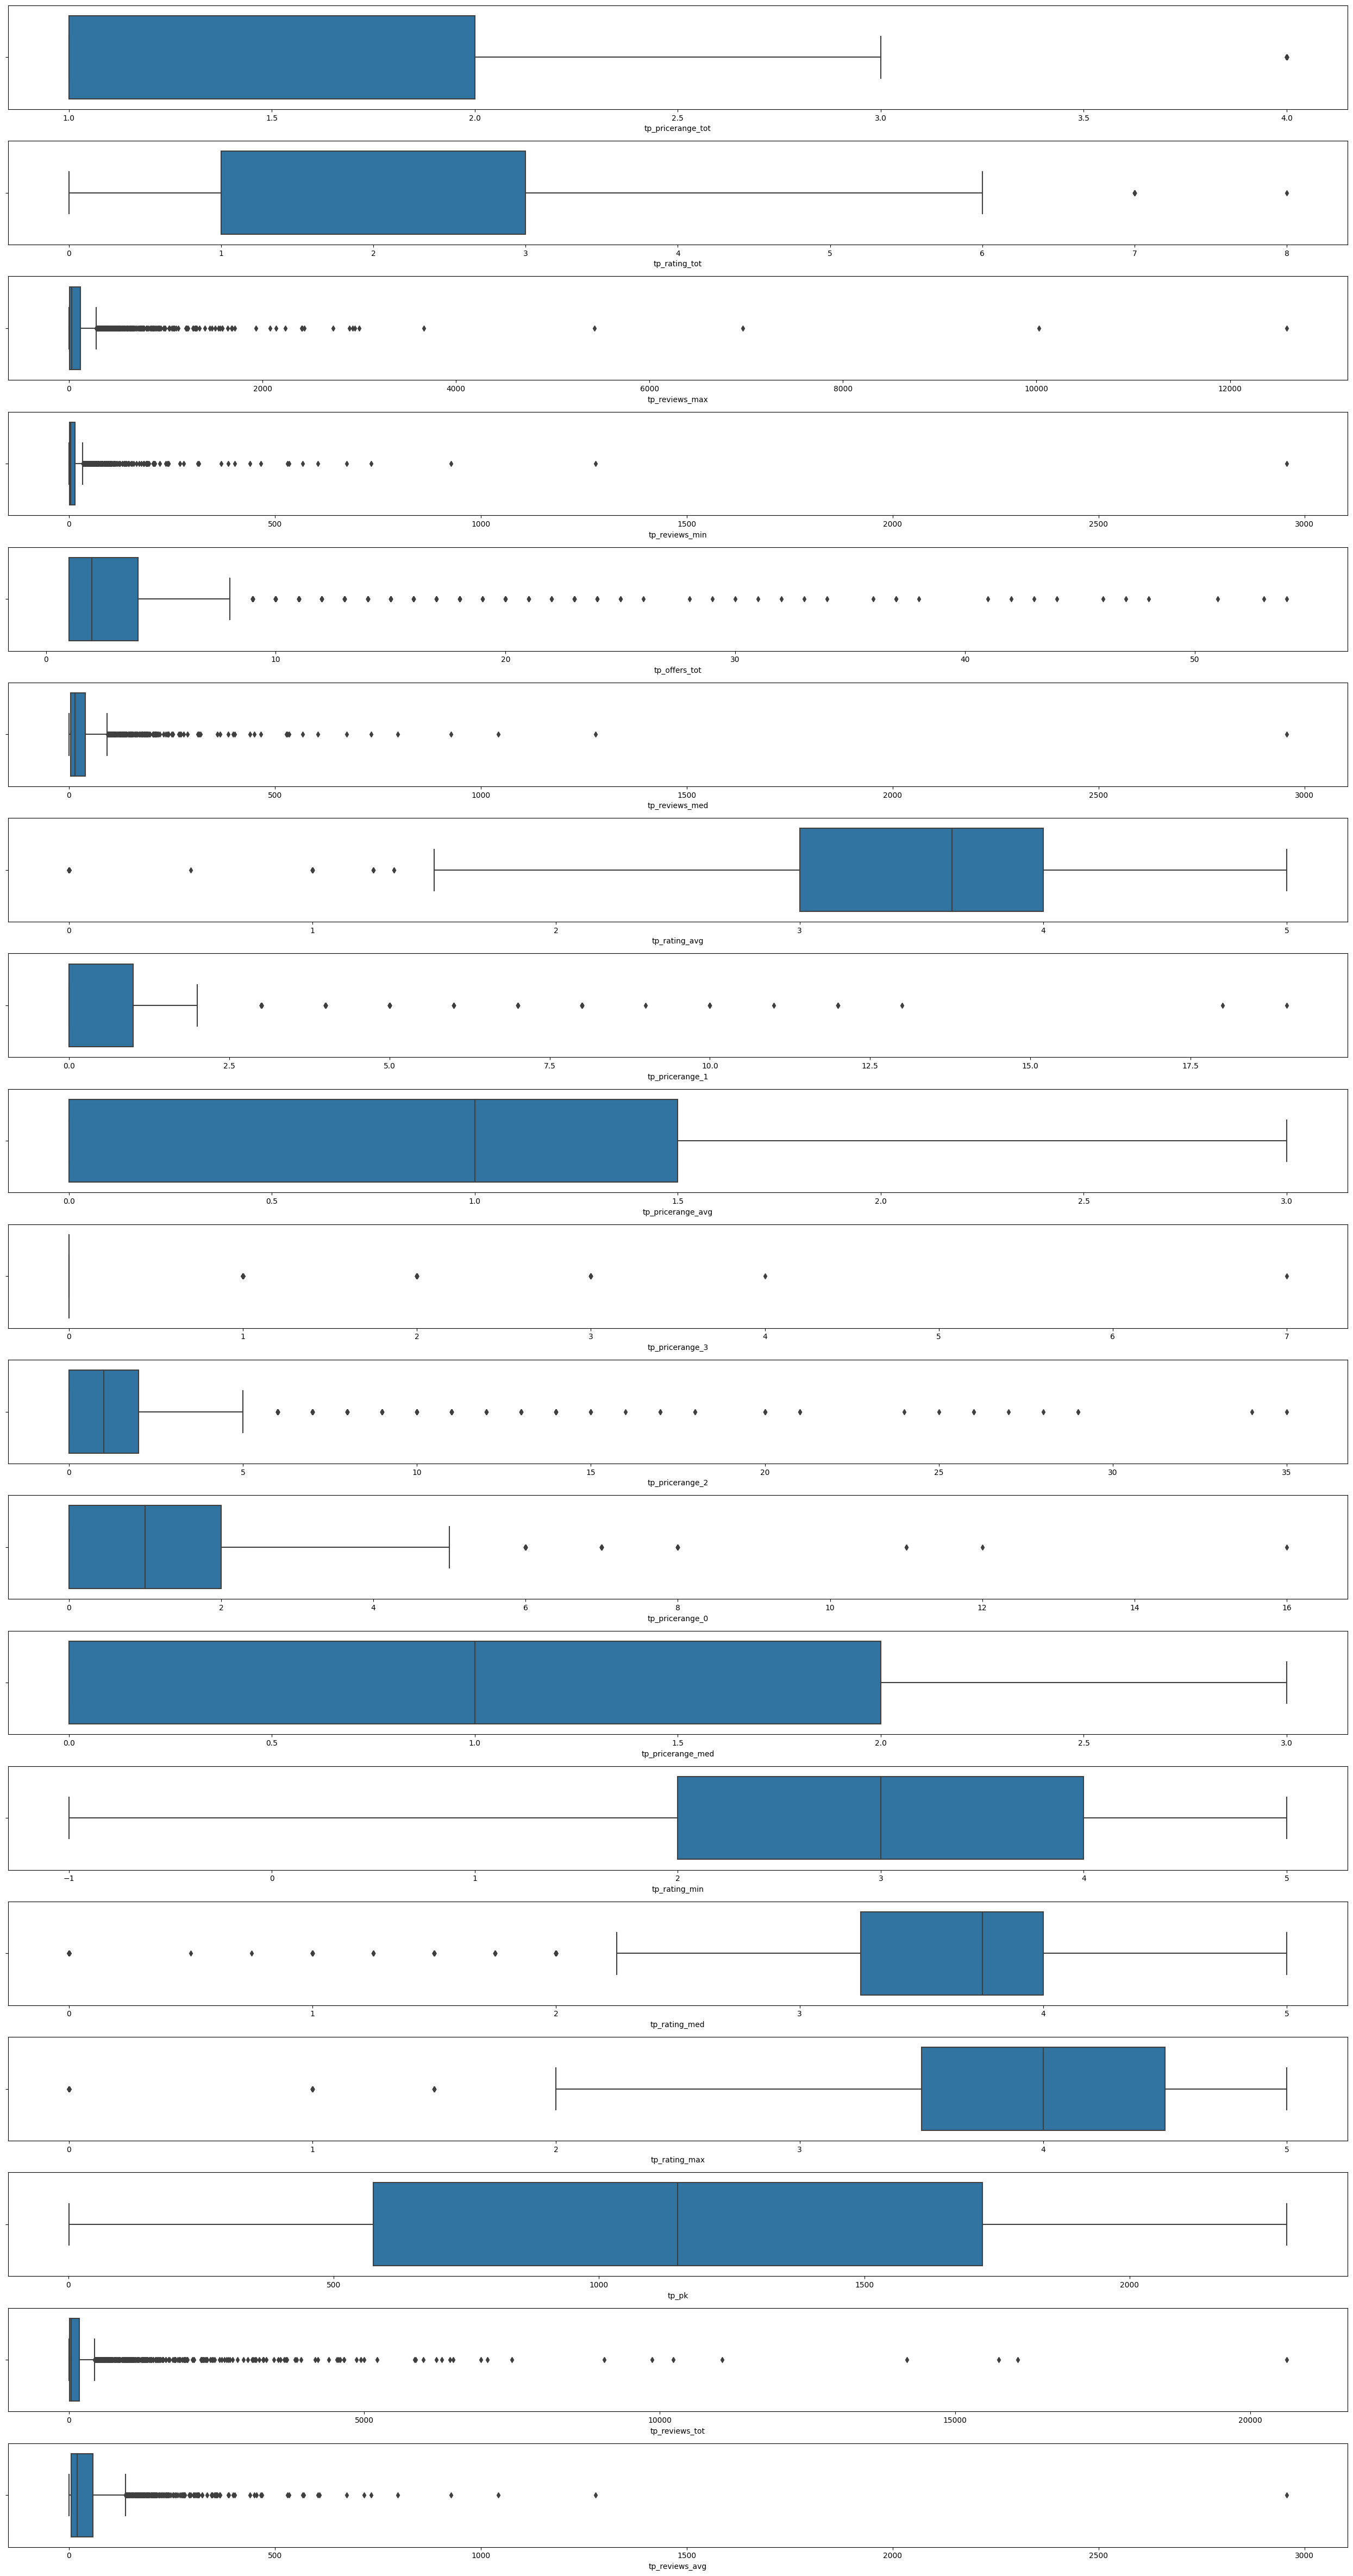

In [37]:
sc.chart_boxplot(df[cols_tripadvisor])

In [39]:
sc.analisis_basico(df[cols_tripadvisor])

_________________________________

1_Data Structure: (12310, 19)


,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tp_pricerange_tot  2296 non-null   float64
 1   tp_rating_tot      2296 non-null   float64
 2   tp_reviews_max     2296 non-null   float64
 3   tp_reviews_min     2296 non-null   float64
 4   tp_offers_tot      2296 non-null   float64
 5   tp_reviews_med     2296 non-null   float64
 6   tp_rating_avg      2296 non-null   float64
 7   tp_pricerange_1    2296 non-null   float64
 8   tp_pricerange_avg  2296 non-null   float64
 9   tp_pricerange_3    2296 non-null   float64
 10  tp_pricerange_2    2296 non-null   float64
 11  tp_pricerange_0    2296 non-null   float64
 12  tp_pricerange_med  2296 non-null   float64
 13  tp_rating_min      2296 non-null   float64
 14  tp_rating_med      2296 non-null   float64
 15  tp_rating_max      2296 non-null   float64
 16  tp_pk              229

None

_________________________________

2_Duplicated columns:
10013
_________________________________

3_Null values distribution:


,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg
nulos,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014
dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg
count,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000
mean,1.633275,1.884146,146.963415,19.117596,3.504791,36.645906,3.372078,0.527439,0.869372,0.117160,1.510889,1.349303,0.880662,2.682709,3.454486,3.818162,1148.500000,316.130662,50.265551
std,0.837888,1.362937,479.421003,83.857334,5.181833,93.548835,1.127623,1.412406,0.801529,0.433602,3.074934,1.445579,0.895109,1.583494,1.141439,1.217758,662.942431,1078.077715,103.972587
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,7.000000,1.000000,1.000000,4.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.250000,3.500000,574.750000,7.000000,5.500000
50%,1.000000,1.000000,28.000000,4.000000,2.000000,14.750000,3.625000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.750000,4.000000,1148.500000,36.000000,20.000000
75%,2.000000,3.000000,117.000000,14.000000,4.000000,40.000000,4.000000,1.000000,1.500000,0.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.500000,1722.250000,176.500000,58.333333
max,4.000000,8.000000,12586.000000,2957.000000,54.000000,2957.000000,5.000000,19.000000,3.000000,7.000000,35.000000,16.000000,3.000000,5.000000,5.000000,5.000000,2296.000000,20615.000000,2957.000000


_________________________________

5_Categorical variables distribution:
No categorical variables available, sorry :(


the variables that come form the tripadvisor website are:
- `'tp_pricerange_tot'` -> total of priceranges?
- `'tp_rating_tot'` -> total of ratings
- `'tp_reviews_max'` -> max review number in an area
- `'tp_reviews_min'` -> min review number in an area
- `'tp_offers_tot'` -> total of offers
- `'tp_reviews_med'` -> median number of offers in the area
- `'tp_rating_avg'` -> avg number of offers in the area
- `'tp_pricerange_1'` -> number of premises on pricerange 1
- `'tp_pricerange_avg'` -> pricerange average
- `'tp_pricerange_3'` -> number of premises on pricerange 3
- `'tp_pricerange_2'` -> number of elements on pricerange 2
- `'tp_pricerange_0'` -> number of elements on pricerange 0
- `'tp_pricerange_med'` -> median value of pricerange
- `'tp_rating_min'` -> minimum rating of the premises on the area
- `'tp_rating_med'` -> median rating of the premises on the area
- `'tp_rating_max'` -> maximum rating of the premises on the area
- `'tp_pk'`
- `'tp_reviews_tot'` -> total number of reviews
- `'tp_reviews_avg'` -> average number of reviews in an area

In [43]:
sc.analisis_basico(df)

_________________________________

1_Data Structure: (12310, 123)


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
0,446400.0,4.477265e+06,1,192.0,332.0,0.0,4.00000,33.0,4860.0,11394.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,79.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
1,446400.0,4.481768e+06,2,153.0,50.0,0.0,3.29969,13.0,4881.0,15460.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Columns: 123 entries, X to rn_med_tramo
dtypes: float64(108), int64(1), object(14)
memory usage: 11.6+ MB


None

_________________________________

2_Duplicated columns:
0
_________________________________

3_Null values distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_web,h_title,h_zipcode,h_latitude,h_email,h_body,h_fax,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_cat2cod,h_country,h_locality,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
nulos,0,0,0,6464,6464,6464,6464,6464,6464,6464,6464,9880,9880,9880,10735,9880,9880,9880,10735,9880,10735,10735,9880,10735,10735,9880,9714,9714,9714,9714,9714,9714,9714,9714,7925,7925,7925,7925,7925,7925,7925,11787,11699,11699,11699,11699,11699,11747,11800,12310,11699,11787,11699,11699,11699,11699,11699,11699,11699,11699,12306,11699,11699,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,3391,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,1905,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,10014,5322
dtypes,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,X,Y,rowid,cad_tot_houses,cad_tot_hab,cad_tot_hotels,cad_med_consq,cad_tot_parcs,cad_pk,cad_tot_srf_houses,cad_tot_srf_hotels,fc_tot_offer,fc_tot_owners,fc_avg_price,rn_ab_min_price,rn_fc_med_price,rn_fc_max_price,rn_fc_offer,rn_ab_tot_price,rn_fc_min_price,rn_ab_med_price,rn_ab_avg_price,rn_fc_avg_price,rn_ab_max_price,rn_ab_offer,rn_fc_tot_price,abnb_tot_beds,abnb_tot_hosts_listings,abnb_tot_price,abnb_tot_offer,abnb_tot_owners,abnb_pk,abnb_tot_reviews,abnb_tot_reviews_per_month,fl_n_tourists,fl_n_locals,fl_txt_madrid,fl_n_date,fl_n_user,fl_n_posts,fl_tag_madrid,h_cat3cod,h_id,h_zipcode,h_latitude,h_fax,h_cat2cod,h_longitude,h_cat1cod,local200_n_shops24h,local200_n_shops,local200_n_prox_fresco,local200_n_prox_supers,local200_n_epigrafes,local200_n_alquillercoche,local200_n_prox_alcohol,local200_n_fiesta,local200_n_prox_noalim,local200_n_alojamiento,local200_n_prox_educacion,local200_n_vacios,local200_n_locutoris,local200_n_restaurants,local200_n_desconocidos,local200_n_prox_pastelerias,local200_n_prox_supersbig,local200_n_agrupaciones,local200_n_locales,local200_n_sex,local300_n_shops24h,local300_n_shops,local300_n_prox_fresco,local300_n_prox_supers,local300_n_epigrafes,local300_n_alquillercoche,local300_n_prox_alcohol,local300_n_fiesta,local300_n_prox_noalim,local300_n_alojamiento,local300_n_prox_educacion,local300_n_vacios,local300_n_locutoris,local300_n_restaurants,local300_n_desconocidos,local300_n_prox_pastelerias,local300_n_prox_supersbig,local300_n_agrupaciones,local300_n_locales,local300_n_sex,tp_pricerange_tot,tp_rating_tot,tp_reviews_max,tp_reviews_min,tp_offers_tot,tp_reviews_med,tp_rating_avg,tp_pricerange_1,tp_pricerange_avg,tp_pricerange_3,tp_pricerange_2,tp_pricerange_0,tp_pricerange_med,tp_rating_min,tp_rating_med,tp_rating_max,tp_pk,tp_reviews_tot,tp_reviews_avg,rn_med_tramo
count,12310.000000,1.231000e+04,12310.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,5846.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,2430.000000,2430.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,1575.000000,1575.000000,2430.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,523.000000,611.000000,611.000000,611.000000,0.0,611.000000,611.000000,611.0,8919.000000,8919.0,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,8919.000000,10405.000000,10405.0,10405.000000,10405.00000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,10405.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,2296.000000,6988.000000
mean,420362.997013,4.253730e+06,6155.500000,286.465446,555.183202,0.111187,4.590012,18.521040,2923.500000,23992.160965,420.108792,2.090123,1.971605,13.840803,2007.519312,1166.326543,1366.224691,2.090123,12965.939418,1034.009053,2399.508069,2489.271166,1182.090159,3359.718783,5.005714,2629.842387,10.032357,38.729584,333.640986,5.110940,4.538521,1298.500000,117.921418,1.122026,2.806613,7.857925,2.100798,7.487571,6.541619,10.664538,7.015964,7029.263862,306.000000,28016.312602,40.428868,NaN,7029.248773,-3.693574,3.0,0.016818,0.0,4.952797,1.226483,31.213925,0.056621,0.145308,0.139814,2.024779,0.237471,1.200807,0.475277,0.645027,9.532571,0.084202,0.912995,0.023882,0.227604,84.604776,0.015697,0.033349,0.0,9.604613,2.37703,46.774147,0.108313,0.282749,0.269870,3.898126,0.458914,2.314272,0.918981,1.244978,18.394618,0.165690,1.763095,0.047381,0.431043,163.148486,0.029

_________________________________

5_Categorical variables distribution:


,h_web,h_title,h_email,h_body,h_phone,h_cat3txt,h_subadministrativearea,h_address,h_cat1txt,h_cat2txt,h_name,h_language,h_country,h_locality
count,611,611,563,510,611,523,611,611,611,611,611,611,611,4
unique,611,611,556,510,607,11,1,606,1,7,611,1,1,1
top,http://www.esmadrid.com/alojamientos/miau_6,Miau,reservas@hostalivor.com,"<p><strong>Su situación, en la plaza de Santa ...",(+34) 91 429 47 01,4 estrellas,Madrid,"Juan XXIII, 3",Alojamientos,Hoteles,Miau,es,Spain,Madrid
freq,1,1,2,1,2,144,611,2,611,259,1,611,611,4


de más a menos nulos:
- hotels
- airbnb
- tripadvisor
- airbnb
- flickr
- fotocasa
- locales
- catastro